<a href="https://colab.research.google.com/github/suhwankweon/Reinforcement_2023-2/blob/main/MountainCar_Q_learning_A68073_%EC%A0%84%ED%98%B8%EA%B2%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MountainCar 환경 install



In [ ]:
!pip install gymnasium
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
from scipy.stats import sem, t

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 11.6 MB/s eta 0:00:00


## 환경 확인

In [ ]:
env = gym.make('MountainCar-v0')
print(env.observation_space)   # Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
print(env.observation_space.high)  # array([0.6 , 0.07], dtype=float32)
print(env.observation_space.low)   # [-1.2  -0.07]
# 첫 번째 차원의 범위는 -1.2에서 0.6, 위치(position)
# 두 번째 차원의 범위는 -0.07에서 0.07, 속도(velocity)
print(env.action_space)   # Discrete(3), 0-push left, 1-no push, 2-push right

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
[0.6  0.07]
[-1.2  -0.07]
Discrete(3)


#ver.1 : Q-Learning 기본 설계 모델
*   learning rate = 0.1 ㅣ GAMMA = 0.99 ㅣ epsilon = 0.9 ㅣ EPISODE = 50,000
*   결과 : average reward: -137.31, 학습 완료(소요 시간 = 34분 34초)

###### LEARNING #####


100%|██████████| 50000/50000 [34:33<00:00, 24.11it/s]


episodes      : 50000
total reward  : -22504327.0
average reward: -450.09

score_list    :
n_epi: 100, score: -1000.0, eps: 89.8%
n_epi: 200, score: -1000.0, eps: 89.6%
n_epi: 300, score: -1000.0, eps: 89.5%
n_epi: 400, score: -1000.0, eps: 89.3%
n_epi: 500, score: -1000.0, eps: 89.1%
n_epi: 600, score: -1000.0, eps: 88.9%
n_epi: 700, score: -1000.0, eps: 88.7%
n_epi: 800, score: -1000.0, eps: 88.5%
n_epi: 900, score: -1000.0, eps: 88.3%
n_epi: 1000, score: -1000.0, eps: 88.2%
n_epi: 1100, score: -1000.0, eps: 88.0%
n_epi: 1200, score: -1000.0, eps: 87.8%
n_epi: 1300, score: -1000.0, eps: 87.6%
n_epi: 1400, score: -1000.0, eps: 87.4%
n_epi: 1500, score: -1000.0, eps: 87.2%
n_epi: 1600, score: -1000.0, eps: 87.1%
n_epi: 1700, score: -1000.0, eps: 86.9%
n_epi: 1800, score: -1000.0, eps: 86.7%
n_epi: 1900, score: -1000.0, eps: 86.5%
n_epi: 2000, score: -1000.0, eps: 86.3%
n_epi: 2100, score: -1000.0, eps: 86.1%
n_epi: 2200, score: -1000.0, eps: 86.0%
n_epi: 2300, score: -1000.0, eps: 85.8

100%|██████████| 1000/1000 [00:18<00:00, 54.03it/s]


episodes      : 1000
total reward  : -137309.0
average reward: -137.31


###### Q_value #####
Q Value       :[[[ 8.13344731e-01 -1.03620128e-01 -3.04861022e-01]
  [-7.63239587e+00 -6.41478276e+00 -6.64011079e+00]
  [-7.65146513e+01 -7.61274539e+01 -7.65093498e+01]
  [-7.67019564e+01 -7.55963140e+01 -7.67028221e+01]
  [-7.67633602e+01 -7.50645336e+01 -7.67693569e+01]
  [-7.48585701e+01 -7.67017875e+01 -7.66851096e+01]
  [-7.67376790e+01 -7.10008474e+01 -7.67333461e+01]
  [-7.66892633e+01 -7.66841503e+01 -7.46031657e+01]
  [-7.62596903e+01 -7.62737575e+01 -7.42125340e+01]
  [-7.55827601e+01 -7.35598873e+01 -7.55823596e+01]
  [-7.83064903e-01 -2.06740587e-01  6.00112181e-01]
  [-7.15645686e-01  2.12961293e-01  8.45980923e-01]
  [-2.61804038e-02  8.37952434e-01 -8.91954905e-01]
  [ 7.18192768e-01  2.45274524e-01 -1.71925156e-02]
  [-9.80732736e-01 -1.42749666e-02  9.47454875e-01]]

 [[ 4.34302142e-01 -6.35290487e-02 -2.49228127e-01]
  [-7.29708138e+01 -7.30385415e+01 -7.31254091e+01]
  [-7

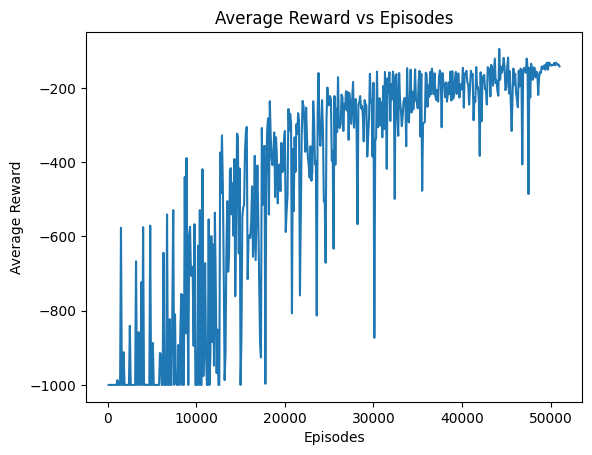

In [ ]:
class Agent:
    def __init__(self, env):
        self.env = env
        self.episode_reward = 0.0
        # 공간을 이산화 하고 분할된 공간에 랜덤 Q-value 설정 (Q-value를 정수형으로 모두 변환)
        self.num_states = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
        self.num_states = np.round(self.num_states, 0).astype(int) + 1
        self.Q = np.random.uniform(low=-1, high=1,size=(self.num_states[0], self.num_states[1], env.action_space.n))
        self.EPS = EPS  # 체크가 안되는 오류로 추가함

        # state level, discretize
    def discretize(self, state):
        state_adj = (state - self.env.observation_space.low) * np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        return state_adj

    def learn(self):
        # one episode learning

        # Discretize state
        state, _ = self.env.reset()
        state_adj = self.discretize(state)
        self.reward = 0
        self.reward_total = 0

        # Decay epsilon
        self.EPS = max(self.EPS - reduction, min_eps)

        for t in range(TURN_LIMIT):

            # Determine next action - epsilon greedy strategy
            if np.random.rand() < self.EPS:
                action = np.random.randint(0, self.env.action_space.n)
            else: # exploit
                action = np.argmax(self.Q[state_adj[0], state_adj[1]])

            # Get next state and reward
            state2, reward, done, _, _ = self.env.step(action)

            # Discretize state2
            state2_adj = self.discretize(state2)

            # Q <- Q + a(Q' - Q)
            # <=> Q <- (1-a)Q + a(Q')
            q_next_max = np.max(self.Q[state2_adj[0],state2_adj[1]])

            # Allow for terminal states
            if done and state2[0] >= 0.5:
                break

            else:
                delta = learning * (reward + GAMMA * q_next_max - self.Q[state_adj[0], state_adj[1], action])
                self.Q[state_adj[0], state_adj[1], action] += delta
                self.reward_total += reward
                state_adj = state2_adj

        return self.reward_total  # over limit



    def test(self):
        state, _ = self.env.reset()
        state_adj = self.discretize(state)
        self.test_reward_total = 0
        self.reward = 0
        for t in range(TURN_LIMIT):
            action = np.argmax(self.Q[state_adj[0], state_adj[1]])
            state2, reward, done, _, _ = self.env.step(action)
            state2_adj = self.discretize(state2)
            if done and state2[0] >= 0.5:
                break
            else:
                self.test_reward_total += reward
                state_adj = state2_adj
        return self.test_reward_total  # over limit

def main():
    env = gym.make('MountainCar-v0')
    agent = Agent(env)

    print("###### LEARNING #####")
    reward_total = 0.0
    score_list = []   # 100에피소드 단위로 에피소드 구간, 리워드, 입실론 기록
    score_list_plt = []   # 그래프 도출을 위한 별도 리스트

    # 현재 시각 기록
    startTime = time.time()

    for i in tqdm(range(EPISODE)):
        reward_total += agent.learn()
        # (셀프 데이터 체크 결과 확인후 보정) the input prameter 'episode' starts from 0 to episode-1 : +1 added
        if ((i+1) != 0) and ((i+1) % 100 == 0):
            i = i+1
            score_list.append("n_epi: {}, score: {:.1f}, eps: {:.1f}%".format(i, agent.learn(), agent.EPS * 100))
            score_list_plt.append(agent.learn())
    print("episodes      : {}".format(EPISODE))
    print("total reward  : {}".format(reward_total))
    print("average reward: {:.2f}".format(reward_total / EPISODE))
    # for group test
    print()
    print("score_list    :\n{}".format('\n'.join(score_list)))
    #print("Q Value       :{}".format(agent.Q))
    #print(agent.Q.shape)   # (19, 15, 3)

    # 경과 시간 체크
    exeTime = time.time() - startTime
    minutes, seconds = divmod(exeTime, 60)
    print("\n학습 완료(소요 시간 = {:.0f}분 {:.0f}초)".format(minutes, seconds))

    # 신뢰구간을 위한 리스트 추가
    confidenc_list = []

    print("\n###### TEST #####")
    reward_total = 0.0
    # score_list_test = []  # 실제 값들의 테스트를 위해 추가 리스트 생성 및 print 진행해봄
    for i in tqdm(range(TEST_EPISODE)):
        reward_total += agent.test()
        confidenc_list.append(agent.test())
        if ((i+1) != 0) and ((i+1) % 100 == 0):
            score_list_plt.append(agent.test())
    print("episodes      : {}".format(TEST_EPISODE))
    print("total reward  : {}".format(reward_total))
    print("average reward: {:.2f}".format(reward_total / TEST_EPISODE))

    print()
    #print(score_list_plt)    #그래프를 위한 리스트 검증
    plt.plot(100 * (np.arange(len(score_list_plt)) + 1), score_list_plt)
    plt.xlabel('Episodes'), plt.ylabel('Average Reward'), plt.title('Average Reward vs Episodes')
    # 코드 결과 : Text(0.5, 1.0, 'Average Reward vs Episodes') : Title's position. (0.5, 1.0) = middle of x, upper line of y

    print("\n###### Q_value #####")
    print("Q Value       :{}\n".format(agent.Q))


    # 신뢰구간을 위한 리스트 추가
    #print(len(confidenc_list))

    confidence = 0.95
    confidence_interval = t.interval(confidence, df=len(confidenc_list)-1, loc=np.mean(confidenc_list), scale=sem(confidenc_list))
    confidence_interval = tuple(round(val, 2) for val in confidence_interval)
    #print("\nconfidence_interval_return = ".format(confidence_interval))
    print("\n###### confidence_interval ######\n")
    print("confidence_interval(test episode):", confidence_interval)
    print("mean: {:.2f}".format(np.mean(confidenc_list)))
    print("standard error of the mean: {:.2f}".format(sem(confidenc_list)))

if __name__ == "__main__":
    # main parameter
    learning = 0.1    # learning rate
    GAMMA = 0.99      # reward discount
    EPS = 0.9         # random walk

# sub parameter
    EPISODE = 50000   # project team maximum default
    TEST_EPISODE = 1000   # fot test setting
    TURN_LIMIT = 1000
    min_eps = 0
    reduction = (EPS - min_eps)/EPISODE

    main()

#ver.1(optional) : Q-Learning 기본 설계 모델 (감마 = 1)


*   learning rate = 0.1 ㅣ** GAMMA = 1** ㅣ epsilon = 0.9 ㅣ EPISODE = 50,000
*   결과 : average reward: -136.77  ㅣ 학습 완료(소요 시간 = 33분 19초)

###### LEARNING #####


100%|██████████| 50000/50000 [33:19<00:00, 25.01it/s]


episodes      : 50000
total reward  : -22389592.0
average reward: -447.79

score_list    :
n_epi: 100, score: -1000.0, eps: 89.8%
n_epi: 200, score: -1000.0, eps: 89.6%
n_epi: 300, score: -1000.0, eps: 89.5%
n_epi: 400, score: -1000.0, eps: 89.3%
n_epi: 500, score: -1000.0, eps: 89.1%
n_epi: 600, score: -1000.0, eps: 88.9%
n_epi: 700, score: -1000.0, eps: 88.7%
n_epi: 800, score: -1000.0, eps: 88.5%
n_epi: 900, score: -733.0, eps: 88.3%
n_epi: 1000, score: -1000.0, eps: 88.2%
n_epi: 1100, score: -1000.0, eps: 88.0%
n_epi: 1200, score: -1000.0, eps: 87.8%
n_epi: 1300, score: -1000.0, eps: 87.6%
n_epi: 1400, score: -1000.0, eps: 87.4%
n_epi: 1500, score: -1000.0, eps: 87.2%
n_epi: 1600, score: -1000.0, eps: 87.1%
n_epi: 1700, score: -1000.0, eps: 86.9%
n_epi: 1800, score: -1000.0, eps: 86.7%
n_epi: 1900, score: -649.0, eps: 86.5%
n_epi: 2000, score: -1000.0, eps: 86.3%
n_epi: 2100, score: -1000.0, eps: 86.1%
n_epi: 2200, score: -717.0, eps: 86.0%
n_epi: 2300, score: -1000.0, eps: 85.8%
n

100%|██████████| 1000/1000 [00:18<00:00, 54.40it/s]


episodes      : 1000
total reward  : -136774.0
average reward: -136.77

[-1000.0, -1000.0, -1000.0, -1000.0, -656.0, -1000.0, -730.0, -877.0, -1000.0, -1000.0, -1000.0, -947.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -712.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -875.0, -1000.0, -1000.0, -1000.0, -922.0, -885.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -447.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -554.0, -1000.0, -1000.0, -1000.0, -921.0, -736.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -531.0, -1000.0, -625.0, -1000.0, -1000.0, -458.0, -1000.0, -1000.0, -1000.0, -1000.0, -769.0, -988.0, -638.0, -1000.0, -1000.0, -1000.0, -1000.0, -546.0, -976.0, -884.0, -502.0, -1000.0, -982.0, -645.0, -1000.0, -1000.0, -458.0, -930.0, -1000.0, -1000.0, -831.0, -507.0, -1000.0, -953.0, -825.0, -1000.0, -1000.0, -411.0, -387.0, -932.0, -1000.0, -484.0, -406.0, -452.0, -412.0, -552.0, -673.0, -809.0, -1000.0, -787.0, -1000

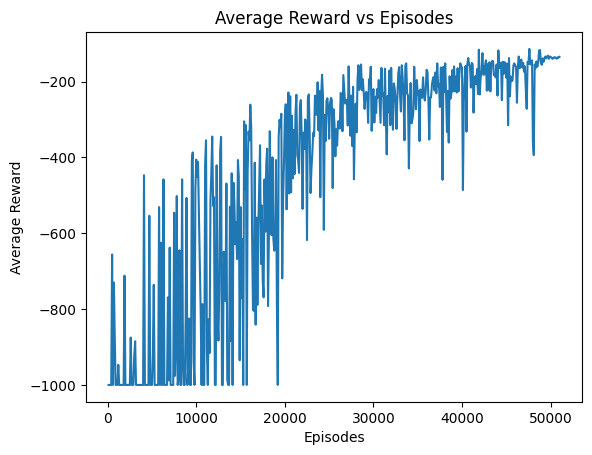

In [ ]:
class Agent:
    def __init__(self, env):
        self.env = env
        self.episode_reward = 0.0
        # 공간을 이산화 하고 분할된 공간에 랜덤 Q-value 설정 (Q-value를 정수형으로 모두 변환)
        self.num_states = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
        self.num_states = np.round(self.num_states, 0).astype(int) + 1
        self.Q = np.random.uniform(low=-1, high=1,size=(self.num_states[0], self.num_states[1], env.action_space.n))
        self.EPS = EPS  # 체크가 안되는 오류로 추가함

        # state level, discretize
    def discretize(self, state):
        state_adj = (state - self.env.observation_space.low) * np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        return state_adj

    def learn(self):
        # one episode learning

        # Discretize state
        state, _ = self.env.reset()
        state_adj = self.discretize(state)
        self.reward_total = 0
        self.reward = 0
        # Decay epsilon
        self.EPS = max(self.EPS - reduction, min_eps)

        for t in range(TURN_LIMIT):

            # Determine next action - epsilon greedy strategy
            if np.random.rand() < self.EPS:
                action = np.random.randint(0, self.env.action_space.n)
            else: # exploit
                action = np.argmax(self.Q[state_adj[0], state_adj[1]])

            # Get next state and reward
            state2, reward, done, _, _ = self.env.step(action)

            # Discretize state2
            state2_adj = self.discretize(state2)

            q_next_max = np.max(self.Q[state2_adj[0],state2_adj[1]])

            # Allow for terminal states
            if done and state2[0] >= 0.5:
                break

            # Q <- Q + a(Q' - Q)
            # <=> Q <- (1-a)Q + a(Q')
            else:
                delta = learning * (reward + GAMMA * q_next_max - self.Q[state_adj[0], state_adj[1], action])
                self.Q[state_adj[0], state_adj[1], action] += delta
                self.reward_total += reward
                state_adj = state2_adj

        return self.reward_total  # over limit

    def test(self):
        state, _ = self.env.reset()
        state_adj = self.discretize(state)
        self.test_reward_total = 0
        self.reward = 0
        for t in range(TURN_LIMIT):
            action = np.argmax(self.Q[state_adj[0], state_adj[1]])
            state2, reward, done, _, _ = self.env.step(action)
            state2_adj = self.discretize(state2)
            if done and state2[0] >= 0.5:
                break
            else:
                self.test_reward_total += reward
                state_adj = state2_adj
        return self.test_reward_total  # over limit

def main():
    env = gym.make('MountainCar-v0')
    agent = Agent(env)

    print("###### LEARNING #####")
    reward_total = 0.0
    score_list = []   # 100에피소드 단위로 에피소드 구간, 리워드, 입실론 기록
    score_list_plt = []   # 그래프 도출을 위한 별도 리스트

    # 현재 시각 기록
    startTime = time.time()

    for i in tqdm(range(EPISODE)):
        reward_total += agent.learn()
        # (셀프 데이터 체크 결과 확인후 보정) the input prameter 'episode' starts from 0 to episode-1 : +1 added
        if ((i+1) != 0) and ((i+1) % 100 == 0):
            i = i+1
            score_list.append("n_epi: {}, score: {:.1f}, eps: {:.1f}%".format(i, agent.learn(), agent.EPS * 100))
            score_list_plt.append(agent.learn())
    print("episodes      : {}".format(EPISODE))
    print("total reward  : {}".format(reward_total))
    print("average reward: {:.2f}".format(reward_total / EPISODE))
    # for group test
    print()
    print("score_list    :\n{}".format('\n'.join(score_list)))
    #print("Q Value       :{}".format(agent.Q))
    #print(agent.Q.shape)   # (19, 15, 3)

    # 경과 시간 체크
    exeTime = time.time() - startTime
    minutes, seconds = divmod(exeTime, 60)
    print("\n학습 완료(소요 시간 = {:.0f}분 {:.0f}초)".format(minutes, seconds))

    print("\n###### TEST #####")
    reward_total = 0.0
    for i in tqdm(range(TEST_EPISODE)):
        reward_total += agent.test()
        if ((i+1) != 0) and ((i+1) % 100 == 0):
            score_list_plt.append(agent.test())

    print("episodes      : {}".format(TEST_EPISODE))
    print("total reward  : {}".format(reward_total))
    print("average reward: {:.2f}".format(reward_total / TEST_EPISODE))
    #print("score_list    :\n{}".format('\n'.join(score_list_test)))

    print()
    print(score_list_plt)
    plt.plot(100 * (np.arange(len(score_list_plt)) + 1), score_list_plt)
    plt.xlabel('Episodes'), plt.ylabel('Average Reward'), plt.title('Average Reward vs Episodes')
    # Text(0.5, 1.0, 'Average Reward vs Episodes') : Title's position. (0.5, 1.0) = middle of x, upper line of y

    print("\n###### Q_value #####")
    print("Q Value       :{}\n".format(agent.Q))

if __name__ == "__main__":
    # main parameter
    learning = 0.1    # learning rate
    GAMMA = 1      # reward discount
    EPS = 0.9         # random walk

# sub parameter
    EPISODE = 50000   # project team maximum default
    TEST_EPISODE = 1000   # fot test setting
    TURN_LIMIT = 1000
    min_eps = 0
    reduction = (EPS - min_eps)/EPISODE

    main()

#ver.2-1 : 추가 실험 설계 - Learning rate decay / step


*   learning rate = 0.1 ㅣ GAMMA = 0.99 ㅣ epsilon = 0.9 ㅣ EPISODE = 50,000
*   결과 : average reward: -140.82 l  학습 완료(소요 시간 = 27분 19초)

(Learning Rate Decay는 기존의 Learning Rate가 높은 경우 loss 값을 빠르게 내릴 수는 있지만, 최적의 학습을 벗어나게 만들고 낮은 경우 최적의 학습을 할 수 잇지만 그 단계까지 너무 오랜 시간이 걸리게 되는 문제를 고려하여 코드를 튜닝한 것으로 처음 시작시 Learning Rate 값을 크게 준 후 일정 EPISODE 마다 값을 감소시켜서 최적의 학습까지 더 빠르게 도달할 수 있게 하는 방법)

###### LEARNING #####


100%|██████████| 50000/50000 [27:18<00:00, 30.51it/s]


episodes      : 50000
total reward  : -17692759.0
average reward: -353.86

score_list    :
n_epi: 100, score: -1000.0, eps: 89.8%
n_epi: 200, score: -1000.0, eps: 89.6%
n_epi: 300, score: -1000.0, eps: 89.5%
n_epi: 400, score: -1000.0, eps: 89.3%
n_epi: 500, score: -1000.0, eps: 89.1%
n_epi: 600, score: -1000.0, eps: 88.9%
n_epi: 700, score: -1000.0, eps: 88.7%
n_epi: 800, score: -1000.0, eps: 88.5%
n_epi: 900, score: -1000.0, eps: 88.3%
n_epi: 1000, score: -1000.0, eps: 88.2%
n_epi: 1100, score: -1000.0, eps: 88.0%
n_epi: 1200, score: -1000.0, eps: 87.8%
n_epi: 1300, score: -1000.0, eps: 87.6%
n_epi: 1400, score: -1000.0, eps: 87.4%
n_epi: 1500, score: -1000.0, eps: 87.2%
n_epi: 1600, score: -1000.0, eps: 87.1%
n_epi: 1700, score: -1000.0, eps: 86.9%
n_epi: 1800, score: -1000.0, eps: 86.7%
n_epi: 1900, score: -1000.0, eps: 86.5%
n_epi: 2000, score: -1000.0, eps: 86.3%
n_epi: 2100, score: -1000.0, eps: 86.1%
n_epi: 2200, score: -1000.0, eps: 86.0%
n_epi: 2300, score: -607.0, eps: 85.8%

100%|██████████| 1000/1000 [00:18<00:00, 53.21it/s]


episodes      : 1000
total reward  : -140817.0
average reward: -140.82

[-1000.0, -1000.0, -1000.0, -1000.0, -611.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -945.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -883.0, -1000.0, -1000.0, -1000.0, -1000.0, -566.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -810.0, -1000.0, -1000.0, -543.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -588.0, -1000.0, -1000.0, -1000.0, -506.0, -554.0, -1000.0, -571.0, -1000.0, -913.0, -1000.0, -1000.0, -459.0, -1000.0, -561.0, -686.0, -471.0, -596.0, -1000.0, -880.0, -578.0, -1000.0, -949.0, -791.0, -1000.0, -1000.0, -909.0, -546.0, -1000.0, -1000.0, -1000.0, -825.0, -556.0, -415.0, -1000.0, -993.0, -435.0, -1000.0, -528.0, -574.0, -631.0, -751.0, -920.0, -723.0, -416.0, -451.0, -710.0, -444.0, -880.0, -306.0, -430.0, -387.0, -569.0, -407.0, -583.0, -317.0, -402.0, -536.0, -590.0, -820.0, -496

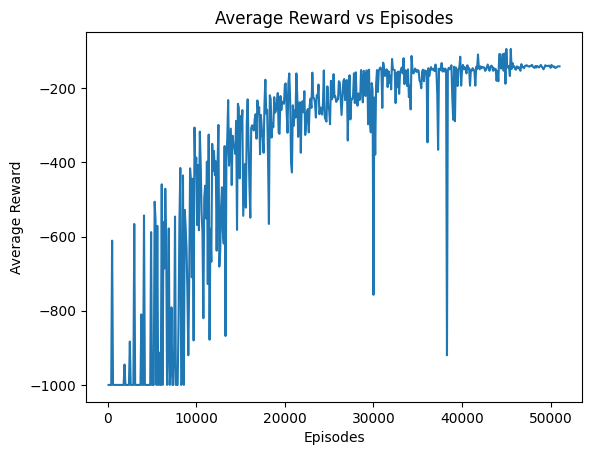

In [ ]:
class Agent:
    def __init__(self, env):
        self.env = env
        self.episode_reward = 0.0
        # 공간을 이산화 하고 분할된 공간에 랜덤 Q-value 설정 (Q-value를 정수형으로 모두 변환)
        self.num_states = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
        self.num_states = np.round(self.num_states, 0).astype(int) + 1
        self.Q = np.random.uniform(low=-1, high=1,size=(self.num_states[0], self.num_states[1], env.action_space.n))
        self.EPS = EPS  # 체크가 안되는 오류로 추가함
        self.learning = learning

        # state level, discretize
    def discretize(self, state):
        state_adj = (state - self.env.observation_space.low) * np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        return state_adj

    def learn(self):
        # one episode learning

        # Discretize state
        state, _ = self.env.reset()
        state_adj = self.discretize(state)
        # print(learning_adj)
        self.reward_total = 0
        self.reward = 0

        # epsilon_decay
        self.EPS = max(self.EPS - reduction, min_eps)

        for t in range(TURN_LIMIT):

            # Determine next action - epsilon greedy strategy
            if np.random.rand() < self.EPS:
                action = np.random.randint(0, self.env.action_space.n)
            else: # exploit
                action = np.argmax(self.Q[state_adj[0], state_adj[1]])

            # Get next state and reward
            state2, reward, done, _, _ = self.env.step(action)

            # Discretize state2
            state2_adj = self.discretize(state2)

            q_next_max = np.max(self.Q[state2_adj[0],state2_adj[1]])

            # Allow for terminal states
            if done and state2[0] >= 0.5:
                break

            # Q <- Q + a(Q' - Q)
            # <=> Q <- (1-a)Q + a(Q')
            else:
                delta = self.learning * (reward + GAMMA * q_next_max - self.Q[state_adj[0], state_adj[1], action])
                self.Q[state_adj[0], state_adj[1], action] += delta
                self.reward_total += reward
                state_adj = state2_adj

        return self.reward_total  # over limit

    def test(self):
        state, _ = self.env.reset()
        state_adj = self.discretize(state)
        self.test_reward_total = 0
        self.reward = 0
        for t in range(TURN_LIMIT):
            action = np.argmax(self.Q[state_adj[0], state_adj[1]])
            state2, reward, done, _, _ = self.env.step(action)
            state2_adj = self.discretize(state2)
            if done and state2[0] >= 0.5:
                break
            else:
                self.test_reward_total += reward
                state_adj = state2_adj
        return self.test_reward_total  # over limit

def main():
    env = gym.make('MountainCar-v0')
    agent = Agent(env)

    print("###### LEARNING #####")
    reward_total = 0.0
    score_list = []   # 100에피소드 단위로 에피소드 구간, 리워드, 입실론 기록
    score_list_plt = []   # 그래프 도출을 위한 별도 리스트

    # 현재 시각 기록
    startTime = time.time()

    for i in tqdm(range(EPISODE)):

        agent.learning = max(0,learning * pow(1 - 0.01, i // 100))   # learning_decay test : 0.01
        #print(agent.learning) # 에피소드에 따라 감소하고 있는지 확인하기 위한 코드 -> 정상임
        reward_total += agent.learn()
        # (셀프 데이터 체크 결과 확인후 보정) the input prameter 'episode' starts from 0 to episode-1 : +1 added
        if ((i+1) != 0) and ((i+1) % 100 == 0):
            i = i+1
            score_list.append("n_epi: {}, score: {:.1f}, eps: {:.1f}%".format(i, agent.learn(), agent.EPS * 100))
            score_list_plt.append(agent.learn())
    print("episodes      : {}".format(EPISODE))
    print("total reward  : {}".format(reward_total))
    print("average reward: {:.2f}".format(reward_total / EPISODE))
    # for group test
    print()
    print("score_list    :\n{}".format('\n'.join(score_list)))
    #print("Q Value       :{}".format(agent.Q))
    #print(agent.Q.shape)   # (19, 15, 3)

    # 경과 시간 체크
    exeTime = time.time() - startTime
    minutes, seconds = divmod(exeTime, 60)
    print("\n학습 완료(소요 시간 = {:.0f}분 {:.0f}초)".format(minutes, seconds))

    # 신뢰구간을 위한 리스트 추가
    confidenc_list = []

    print("\n###### TEST #####")
    reward_total = 0.0
    for i in tqdm(range(TEST_EPISODE)):
        reward_total += agent.test()
        confidenc_list.append(agent.test())
        if ((i+1) != 0) and ((i+1) % 100 == 0):
            score_list_plt.append(agent.test())
    print("episodes      : {}".format(TEST_EPISODE))
    print("total reward  : {}".format(reward_total))
    print("average reward: {:.2f}".format(reward_total / TEST_EPISODE))
    #print("score_list    :\n{}".format('\n'.join(score_list_test)))

    print()
    print(score_list_plt)
    plt.plot(100 * (np.arange(len(score_list_plt)) + 1), score_list_plt)
    plt.xlabel('Episodes'), plt.ylabel('Average Reward'), plt.title('Average Reward vs Episodes')
    # Text(0.5, 1.0, 'Average Reward vs Episodes') : Title's position. (0.5, 1.0) = middle of x, upper line of y

    print("\n###### Q_value #####")
    print("Q Value       :{}\n".format(agent.Q))

if __name__ == "__main__":
    # main parameter
    learning = 0.1    # learning rate
    GAMMA = 0.99      # reward discount
    EPS = 0.9         # random walk

# sub parameter
    EPISODE = 50000   # project team maximum default
    TEST_EPISODE = 1000   # fot test setting
    TURN_LIMIT = 1000
    min_eps = 0
    reduction = (EPS - min_eps)/EPISODE

    main()

#ver.2-1(optional) : 추가 실험 설계 - Learning rate decay / step

*   **learning rate = 0.2** ㅣ GAMMA = 0.99 ㅣ epsilon = 0.9 ㅣ EPISODE = 50,000
*   결과 : average reward: -152.24  l  학습 완료(소요 시간 = 30분 22초)

###### LEARNING #####


100%|██████████| 50000/50000 [30:21<00:00, 27.45it/s]


episodes      : 50000
total reward  : -19176727.0
average reward: -383.53

score_list    :
n_epi: 100, score: -1000.0, eps: 89.8%
n_epi: 200, score: -1000.0, eps: 89.6%
n_epi: 300, score: -1000.0, eps: 89.5%
n_epi: 400, score: -1000.0, eps: 89.3%
n_epi: 500, score: -1000.0, eps: 89.1%
n_epi: 600, score: -1000.0, eps: 88.9%
n_epi: 700, score: -1000.0, eps: 88.7%
n_epi: 800, score: -1000.0, eps: 88.5%
n_epi: 900, score: -1000.0, eps: 88.3%
n_epi: 1000, score: -1000.0, eps: 88.2%
n_epi: 1100, score: -1000.0, eps: 88.0%
n_epi: 1200, score: -1000.0, eps: 87.8%
n_epi: 1300, score: -1000.0, eps: 87.6%
n_epi: 1400, score: -1000.0, eps: 87.4%
n_epi: 1500, score: -1000.0, eps: 87.2%
n_epi: 1600, score: -1000.0, eps: 87.1%
n_epi: 1700, score: -1000.0, eps: 86.9%
n_epi: 1800, score: -1000.0, eps: 86.7%
n_epi: 1900, score: -1000.0, eps: 86.5%
n_epi: 2000, score: -1000.0, eps: 86.3%
n_epi: 2100, score: -987.0, eps: 86.1%
n_epi: 2200, score: -1000.0, eps: 86.0%
n_epi: 2300, score: -1000.0, eps: 85.8%

100%|██████████| 1000/1000 [00:21<00:00, 46.80it/s]


episodes      : 1000
total reward  : -152241.0
average reward: -152.24

[-1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -873.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -831.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -670.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -949.0, -1000.0, -1000.0, -968.0, -965.0, -1000.0, -1000.0, -1000.0, -884.0, -1000.0, -891.0, -1000.0, -571.0, -633.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -434.0, -884.0, -608.0, -728.0, -832.0, -763.0, -924.0, -979.0, -681.0, -552.0, -707.0, -468.0, -937.0, -1000.0, -480.0, -904.0, -736.0, -916.0, -608.0, -946.0, -557.0, -914.0, -897.0, -916.0, -224.0, -330.0, -423.0, -581.0, -424.0, -683.0, -86

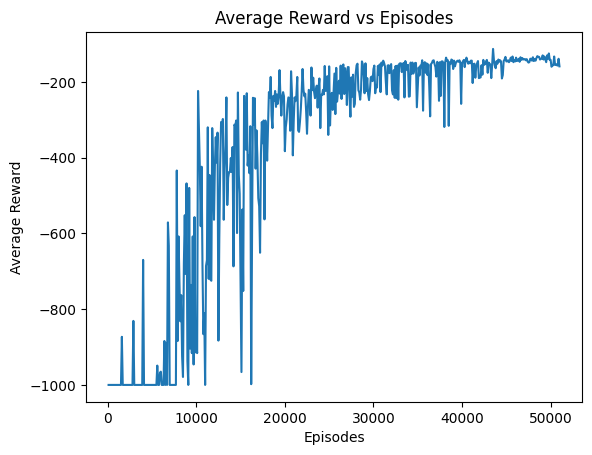

In [ ]:
class Agent:
    def __init__(self, env):
        self.env = env
        self.episode_reward = 0.0
        # 공간을 이산화 하고 분할된 공간에 랜덤 Q-value 설정 (Q-value를 정수형으로 모두 변환)
        self.num_states = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
        self.num_states = np.round(self.num_states, 0).astype(int) + 1
        self.Q = np.random.uniform(low=-1, high=1,size=(self.num_states[0], self.num_states[1], env.action_space.n))
        self.EPS = EPS  # 체크가 안되는 오류로 추가함
        self.learning = learning

        # state level, discretize
    def discretize(self, state):
        state_adj = (state - self.env.observation_space.low) * np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        return state_adj

    def learn(self):
        # one episode learning

        # Discretize state
        state, _ = self.env.reset()
        state_adj = self.discretize(state)
        # print(learning_adj)
        self.reward_total = 0
        self.reward = 0

        # epsilon_decay
        self.EPS = max(self.EPS - reduction, min_eps)

        for t in range(TURN_LIMIT):

            # Determine next action - epsilon greedy strategy
            if np.random.rand() < self.EPS:
                action = np.random.randint(0, self.env.action_space.n)
            else: # exploit
                action = np.argmax(self.Q[state_adj[0], state_adj[1]])

            # Get next state and reward
            state2, reward, done, _, _ = self.env.step(action)

            # Discretize state2
            state2_adj = self.discretize(state2)

            q_next_max = np.max(self.Q[state2_adj[0],state2_adj[1]])

            # Allow for terminal states
            if done and state2[0] >= 0.5:
                break

            # Q <- Q + a(Q' - Q)
            # <=> Q <- (1-a)Q + a(Q')
            else:
                delta = self.learning * (reward + GAMMA * q_next_max - self.Q[state_adj[0], state_adj[1], action])
                self.Q[state_adj[0], state_adj[1], action] += delta
                self.reward_total += reward
                state_adj = state2_adj

        return self.reward_total  # over limit

    def test(self):
        state, _ = self.env.reset()
        state_adj = self.discretize(state)
        self.test_reward_total = 0
        self.reward = 0
        for t in range(TURN_LIMIT):
            action = np.argmax(self.Q[state_adj[0], state_adj[1]])
            state2, reward, done, _, _ = self.env.step(action)
            state2_adj = self.discretize(state2)
            if done and state2[0] >= 0.5:
                break
            else:
                self.test_reward_total += reward
                state_adj = state2_adj
        return self.test_reward_total  # over limit

def main():
    env = gym.make('MountainCar-v0')
    agent = Agent(env)

    print("###### LEARNING #####")
    reward_total = 0.0
    score_list = []   # 100에피소드 단위로 에피소드 구간, 리워드, 입실론 기록
    score_list_plt = []   # 그래프 도출을 위한 별도 리스트

    # 현재 시각 기록
    startTime = time.time()

    for i in tqdm(range(EPISODE)):

        agent.learning = max(0,learning * pow(1 - 0.01, i // 100))   # learning_decay test : 0.01
        #print(agent.learning) # 에피소드에 따라 감소하고 있는지 확인하기 위한 코드 -> 정상임
        reward_total += agent.learn()
        # (셀프 데이터 체크 결과 확인후 보정) the input prameter 'episode' starts from 0 to episode-1 : +1 added
        if ((i+1) != 0) and ((i+1) % 100 == 0):
            i = i+1
            score_list.append("n_epi: {}, score: {:.1f}, eps: {:.1f}%".format(i, agent.learn(), agent.EPS * 100))
            score_list_plt.append(agent.learn())
    print("episodes      : {}".format(EPISODE))
    print("total reward  : {}".format(reward_total))
    print("average reward: {:.2f}".format(reward_total / EPISODE))
    # for group test
    print()
    print("score_list    :\n{}".format('\n'.join(score_list)))
    #print("Q Value       :{}".format(agent.Q))
    #print(agent.Q.shape)   # (19, 15, 3)

    # 경과 시간 체크
    exeTime = time.time() - startTime
    minutes, seconds = divmod(exeTime, 60)
    print("\n학습 완료(소요 시간 = {:.0f}분 {:.0f}초)".format(minutes, seconds))

    # 신뢰구간을 위한 리스트 추가
    confidenc_list = []

    print("\n###### TEST #####")
    reward_total = 0.0
    for i in tqdm(range(TEST_EPISODE)):
        reward_total += agent.test()
        confidenc_list.append(agent.test())
        if ((i+1) != 0) and ((i+1) % 100 == 0):
            score_list_plt.append(agent.test())
    print("episodes      : {}".format(TEST_EPISODE))
    print("total reward  : {}".format(reward_total))
    print("average reward: {:.2f}".format(reward_total / TEST_EPISODE))
    #print("score_list    :\n{}".format('\n'.join(score_list_test)))

    print()
    print(score_list_plt)
    plt.plot(100 * (np.arange(len(score_list_plt)) + 1), score_list_plt)
    plt.xlabel('Episodes'), plt.ylabel('Average Reward'), plt.title('Average Reward vs Episodes')
    # Text(0.5, 1.0, 'Average Reward vs Episodes') : Title's position. (0.5, 1.0) = middle of x, upper line of y

    print("\n###### Q_value #####")
    print("Q Value       :{}\n".format(agent.Q))

if __name__ == "__main__":
    # main parameter
    learning = 0.2    # learning rate
    GAMMA = 0.99      # reward discount
    EPS = 0.9         # random walk

# sub parameter
    EPISODE = 50000   # project team maximum default
    TEST_EPISODE = 1000   # fot test setting
    TURN_LIMIT = 1000
    min_eps = 0
    reduction = (EPS - min_eps)/EPISODE

    main()

#ver.2-2 : 추가 실험 설계 - Learning rate decay / cosine


*   learning rate = 0.1 ㅣ GAMMA = 0.99 ㅣ epsilon = 0.9 ㅣ EPISODE = 50,000
*   결과 : average reward: -151.19  l  학습 완료(소요 시간 = 31분 55초)


###### LEARNING #####


100%|██████████| 50000/50000 [31:55<00:00, 26.11it/s]


episodes      : 50000
total reward  : -20614743.0
average reward: -412.29

score_list    :
n_epi: 100, score: -1000.0, eps: 89.8%
n_epi: 200, score: -1000.0, eps: 89.6%
n_epi: 300, score: -1000.0, eps: 89.5%
n_epi: 400, score: -1000.0, eps: 89.3%
n_epi: 500, score: -1000.0, eps: 89.1%
n_epi: 600, score: -1000.0, eps: 88.9%
n_epi: 700, score: -1000.0, eps: 88.7%
n_epi: 800, score: -1000.0, eps: 88.5%
n_epi: 900, score: -1000.0, eps: 88.3%
n_epi: 1000, score: -1000.0, eps: 88.2%
n_epi: 1100, score: -1000.0, eps: 88.0%
n_epi: 1200, score: -1000.0, eps: 87.8%
n_epi: 1300, score: -1000.0, eps: 87.6%
n_epi: 1400, score: -1000.0, eps: 87.4%
n_epi: 1500, score: -1000.0, eps: 87.2%
n_epi: 1600, score: -1000.0, eps: 87.1%
n_epi: 1700, score: -1000.0, eps: 86.9%
n_epi: 1800, score: -1000.0, eps: 86.7%
n_epi: 1900, score: -1000.0, eps: 86.5%
n_epi: 2000, score: -1000.0, eps: 86.3%
n_epi: 2100, score: -799.0, eps: 86.1%
n_epi: 2200, score: -1000.0, eps: 86.0%
n_epi: 2300, score: -1000.0, eps: 85.8%

100%|██████████| 1000/1000 [00:09<00:00, 110.42it/s]


episodes      : 1000
total reward  : -151185.0
average reward: -151.19

[-1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -834.0, -1000.0, -1000.0, -1000.0, -1000.0, -877.0, -1000.0, -1000.0, -1000.0, -948.0, -1000.0, -899.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -721.0, -859.0, -1000.0, -1000.0, -828.0, -1000.0, -658.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -931.0, -1000.0, -1000.0, -729.0, -1000.0, -457.0, -1000.0, -1000.0, -1000.0, -570.0, -957.0, -1000.0, -968.0, -890.0, -707.0, -390.0, -857.0, -882.0, -765.0, -797.0, -1000.0, -1000.0, -1000.0, -941.0, -803.0, -711.0, -854.0, -1000.0, -1000.0, -911.0, -397.0, -875.0, -744.0, -1000.0, -476.0, -1000.0, -1000.0, -747.0, -1000.0, -700.0, -697.0, -1000.0, -574.0, -950.0, -872.0, -493.0, -540.0, -1000.0, -569.0, -1000.0, -1000.0, -71

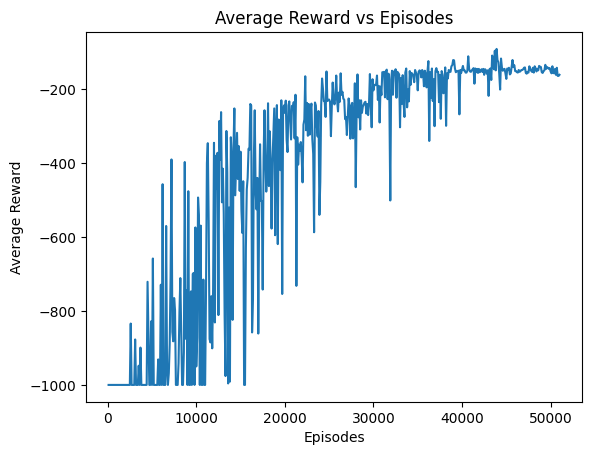

In [ ]:
class Agent:
    def __init__(self, env):
        self.env = env
        self.episode_reward = 0.0
        # 공간을 이산화 하고 분할된 공간에 랜덤 Q-value 설정 (Q-value를 정수형으로 모두 변환)
        self.num_states = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
        self.num_states = np.round(self.num_states, 0).astype(int) + 1
        self.Q = np.random.uniform(low=-1, high=1,size=(self.num_states[0], self.num_states[1], env.action_space.n))
        self.EPS = EPS  # 체크가 안되는 오류로 추가함
        self.learning = learning

        # state level, discretize
    def discretize(self, state):
        state_adj = (state - self.env.observation_space.low) * np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        return state_adj

    def learn(self):
        # one episode learning

        # Discretize state
        state, _ = self.env.reset()
        state_adj = self.discretize(state)
        # print(learning_adj)
        self.reward_total = 0
        self.reward = 0

        # epsilon_decay
        self.EPS = max(self.EPS - reduction, min_eps)

        for t in range(TURN_LIMIT):

            # Determine next action - epsilon greedy strategy
            if np.random.rand() < self.EPS:
                action = np.random.randint(0, self.env.action_space.n)
            else: # exploit
                action = np.argmax(self.Q[state_adj[0], state_adj[1]])

            # Get next state and reward
            state2, reward, done, _, _ = self.env.step(action)

            # Discretize state2
            state2_adj = self.discretize(state2)

            q_next_max = np.max(self.Q[state2_adj[0],state2_adj[1]])

            # Allow for terminal states
            if done and state2[0] >= 0.5:
                break

            # Q <- Q + a(Q' - Q)
            # <=> Q <- (1-a)Q + a(Q')
            else:
                delta = self.learning * (reward + GAMMA * q_next_max - self.Q[state_adj[0], state_adj[1], action])
                self.Q[state_adj[0], state_adj[1], action] += delta
                self.reward_total += reward
                state_adj = state2_adj

        return self.reward_total  # over limit

    def test(self):
        state, _ = self.env.reset()
        state_adj = self.discretize(state)
        self.test_reward_total = 0
        self.reward = 0
        for t in range(TURN_LIMIT):
            action = np.argmax(self.Q[state_adj[0], state_adj[1]])
            state2, reward, done, _, _ = self.env.step(action)
            state2_adj = self.discretize(state2)
            if done and state2[0] >= 0.5:
                break
            else:
                self.test_reward_total += reward
                state_adj = state2_adj
        return self.test_reward_total  # over limit

def main():
    env = gym.make('MountainCar-v0')
    agent = Agent(env)

    print("###### LEARNING #####")
    reward_total = 0.0
    score_list = []   # 100에피소드 단위로 에피소드 구간, 리워드, 입실론 기록
    score_list_plt = []   # 그래프 도출을 위한 별도 리스트

    # 현재 시각 기록
    startTime = time.time()

    for i in tqdm(range(EPISODE)):

        # cosine_decay
        # agent.learning = max(0,learning * pow(1 - 0.01, i // 100))   # learning_decay test : 0.01
        agent.learning = 0.5 * learning * (1 + np.cos(( i  * np.pi ) / 50000))
        # print(agent.learning) # 에피소드에 따라 감소하고 있는지 확인하기 위한 코드 -> 정상임
        reward_total += agent.learn()
        # (셀프 데이터 체크 결과 확인후 보정) the input prameter 'episode' starts from 0 to episode-1 : +1 added
        if ((i+1) != 0) and ((i+1) % 100 == 0):
            i = i+1
            score_list.append("n_epi: {}, score: {:.1f}, eps: {:.1f}%".format(i, agent.learn(), agent.EPS * 100))
            score_list_plt.append(agent.learn())
    print("episodes      : {}".format(EPISODE))
    print("total reward  : {}".format(reward_total))
    print("average reward: {:.2f}".format(reward_total / EPISODE))
    # for group test
    print()
    print("score_list    :\n{}".format('\n'.join(score_list)))
    #print("Q Value       :{}".format(agent.Q))
    #print(agent.Q.shape)   # (19, 15, 3)

    # 경과 시간 체크
    exeTime = time.time() - startTime
    minutes, seconds = divmod(exeTime, 60)
    print("\n학습 완료(소요 시간 = {:.0f}분 {:.0f}초)".format(minutes, seconds))

    print("\n###### TEST #####")
    reward_total = 0.0
    for i in tqdm(range(TEST_EPISODE)):
        reward_total += agent.test()
        if ((i+1) != 0) and ((i+1) % 100 == 0):
            score_list_plt.append(agent.test())
    print("episodes      : {}".format(TEST_EPISODE))
    print("total reward  : {}".format(reward_total))
    print("average reward: {:.2f}".format(reward_total / TEST_EPISODE))
    #print("score_list    :\n{}".format('\n'.join(score_list_test)))

    print()
    print(score_list_plt)
    plt.plot(100 * (np.arange(len(score_list_plt)) + 1), score_list_plt)
    plt.xlabel('Episodes'), plt.ylabel('Average Reward'), plt.title('Average Reward vs Episodes')
    # Text(0.5, 1.0, 'Average Reward vs Episodes') : Title's position. (0.5, 1.0) = middle of x, upper line of y

    print("\n###### Q_value #####")
    print("Q Value       :{}\n".format(agent.Q))

if __name__ == "__main__":
    # main parameter
    learning = 0.1    # learning rate
    GAMMA = 0.99      # reward discount
    EPS = 0.9         # random walk

# sub parameter
    EPISODE = 50000   # project team maximum default
    TEST_EPISODE = 1000   # fot test setting
    TURN_LIMIT = 1000
    min_eps = 0
    reduction = (EPS - min_eps)/EPISODE

    main()

#ver.3 : 추가 실험 설계 - observation space more discrete
*   (19, 15, 3) ->  (30, 30, 3)
*   learning rate = 0.1 ㅣ GAMMA = 0.99 ㅣ epsilon = 0.9 ㅣ EPISODE = 50,000
*   결과 : average reward: -174.51  l  학습 완료(소요 시간 = 28분 8초)

###### LEARNING #####


100%|██████████| 50000/50000 [28:08<00:00, 29.62it/s]


episodes      : 50000
total reward  : -17226683.0
average reward: -344.53

score_list    :
n_epi: 100, score: -1000.0, eps: 89.8%
n_epi: 200, score: -1000.0, eps: 89.6%
n_epi: 300, score: -1000.0, eps: 89.5%
n_epi: 400, score: -1000.0, eps: 89.3%
n_epi: 500, score: -1000.0, eps: 89.1%
n_epi: 600, score: -1000.0, eps: 88.9%
n_epi: 700, score: -936.0, eps: 88.7%
n_epi: 800, score: -1000.0, eps: 88.5%
n_epi: 900, score: -1000.0, eps: 88.3%
n_epi: 1000, score: -1000.0, eps: 88.2%
n_epi: 1100, score: -1000.0, eps: 88.0%
n_epi: 1200, score: -1000.0, eps: 87.8%
n_epi: 1300, score: -1000.0, eps: 87.6%
n_epi: 1400, score: -1000.0, eps: 87.4%
n_epi: 1500, score: -1000.0, eps: 87.2%
n_epi: 1600, score: -1000.0, eps: 87.1%
n_epi: 1700, score: -1000.0, eps: 86.9%
n_epi: 1800, score: -1000.0, eps: 86.7%
n_epi: 1900, score: -1000.0, eps: 86.5%
n_epi: 2000, score: -1000.0, eps: 86.3%
n_epi: 2100, score: -887.0, eps: 86.1%
n_epi: 2200, score: -1000.0, eps: 86.0%
n_epi: 2300, score: -1000.0, eps: 85.8%


100%|██████████| 1000/1000 [00:13<00:00, 75.21it/s]


episodes      : 1000
total reward  : -174511.0
average reward: -174.51

[-1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -822.0, -1000.0, -1000.0, -1000.0, -1000.0, -873.0, -1000.0, -723.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -707.0, -934.0, -1000.0, -1000.0, -421.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -840.0, -798.0, -1000.0, -769.0, -1000.0, -1000.0, -541.0, -890.0, -1000.0, -723.0, -609.0, -585.0, -1000.0, -622.0, -789.0, -505.0, -707.0, -657.0, -788.0, -1000.0, -698.0, -728.0, -1000.0, -411.0, -1000.0, -673.0, -634.0, -926.0, -695.0, -595.0, -653.0, -591.0, -490.0, -500.0, -945.0, -943.0, -591.0, -866.0, -403.0, -866.0, -616.0, -442.0, -686.0, -568.0, -626.0, -658.0, -479.0, -523.0, -412.0, -603.0, -438.0, -475.0, -418.0, -772.0, -447.0, -396.0, -334.0, -671.0, -551.0, -569.0, -966.0, -397.0, -974.0, -676.0, -609.0, -710.0, -738.0, -646.0, -263.0, -318.0, -576.0, -560.0, -465.0, -901.0, -308.0, -660.0, -4

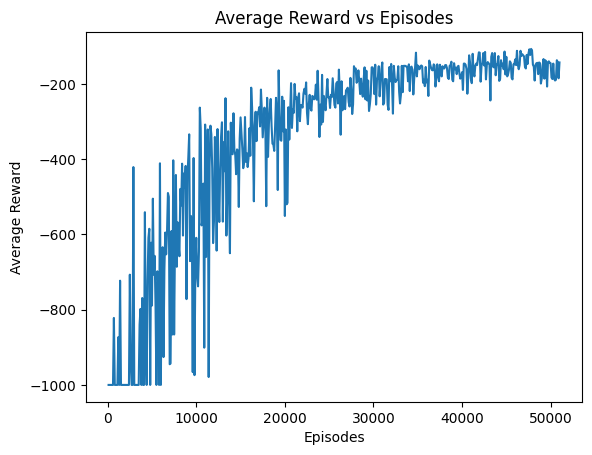

In [ ]:
class Agent:
    def __init__(self, env):
        self.env = env
        self.episode_reward = 0.0
        self.high_space = np.linspace(-1.2, 0.6, 30)
        self.speed_space = np.linspace(-0.07, 0.07, 30)
        self.num_states = (int(np.round(len(np.linspace(-1.2, 0.6, 30)))),int(np.round(len(np.linspace(-0.07, 0.07, 30)))))
        self.Q = np.random.uniform(low=-1, high=1,size=(self.num_states[0], self.num_states[1], env.action_space.n))
        #print(self.Q.shape)   # (30, 30, 3)

        self.EPS = EPS  # 체크가 안되는 오류로 추가함

    def discretize(self, stete): #환경의 연속적인 관측값을 이산 상태로 매핑
        high, speed =  stete[0], stete[1]
        high_bin = int(np.digitize(high, self.high_space))
        speed_bin = int(np.digitize(speed, self.speed_space))
        return (high_bin, speed_bin)

    def learn(self):
        # one episode learning

        # Discretize state
        state, _ = self.env.reset()
        state_adj = self.discretize(state)
        self.reward_total = 0
        self.reward = 0
        # Decay epsilon
        self.EPS = max(self.EPS - reduction, min_eps)

        for t in range(TURN_LIMIT):

            # Determine next action - epsilon greedy strategy
            if np.random.rand() < self.EPS:
                action = np.random.randint(0, self.env.action_space.n)
            else: # exploit
                action = np.argmax(self.Q[state_adj[0], state_adj[1]])

            # Get next state and reward
            state2, reward, done, _, _ = self.env.step(action)

            # Discretize state2
            state2_adj = self.discretize(state2)

            q_next_max = np.max(self.Q[state2_adj[0],state2_adj[1]])

            # Allow for terminal states
            if done and state2[0] >= 0.5:
                break

            # Q <- Q + a(Q' - Q)
            # <=> Q <- (1-a)Q + a(Q')
            else:
                delta = learning * (reward + GAMMA * q_next_max - self.Q[state_adj[0], state_adj[1], action])
                self.Q[state_adj[0], state_adj[1], action] += delta
                self.reward_total += reward
                state_adj = state2_adj

        return self.reward_total  # over limit



    def test(self):
        state, _ = self.env.reset()
        state_adj = self.discretize(state)
        self.test_reward_total = 0
        self.reward = 0
        for t in range(TURN_LIMIT):
            action = np.argmax(self.Q[state_adj[0], state_adj[1]])
            state2, reward, done, _, _ = self.env.step(action)
            state2_adj = self.discretize(state2)
            if done and state2[0] >= 0.5:
                break
            else:
                self.test_reward_total += reward
                state_adj = state2_adj
        return self.test_reward_total  # over limit

def main():
    env = gym.make('MountainCar-v0')
    agent = Agent(env)

    print("###### LEARNING #####")
    reward_total = 0.0
    score_list = []   # 100에피소드 단위로 에피소드 구간, 리워드, 입실론 기록
    score_list_plt = []   # 그래프 도출을 위한 별도 리스트

    # 현재 시각 기록
    startTime = time.time()

    for i in tqdm(range(EPISODE)):
        reward_total += agent.learn()
        # (셀프 데이터 체크 결과 확인후 보정) the input prameter 'episode' starts from 0 to episode-1 : +1 added
        if ((i+1) != 0) and ((i+1) % 100 == 0):
            i = i+1
            score_list.append("n_epi: {}, score: {:.1f}, eps: {:.1f}%".format(i, agent.learn(), agent.EPS * 100))
            score_list_plt.append(agent.learn())
    print("episodes      : {}".format(EPISODE))
    print("total reward  : {}".format(reward_total))
    print("average reward: {:.2f}".format(reward_total / EPISODE))
    # for group test
    print()
    print("score_list    :\n{}".format('\n'.join(score_list)))
    #print("Q Value       :{}".format(agent.Q))
    #print(agent.Q.shape)   # (19, 15, 3)

    # 경과 시간 체크
    exeTime = time.time() - startTime
    minutes, seconds = divmod(exeTime, 60)
    print("\n학습 완료(소요 시간 = {:.0f}분 {:.0f}초)".format(minutes, seconds))

    print("\n###### TEST #####")
    reward_total = 0.0
    # score_list_test = []  # 실제 값들의 테스트를 위해 추가 리스트 생성 및 print 진행해봄
    for i in tqdm(range(TEST_EPISODE)):
        reward_total += agent.test()
        if ((i+1) != 0) and ((i+1) % 100 == 0):
            score_list_plt.append(agent.test())
    print("episodes      : {}".format(TEST_EPISODE))
    print("total reward  : {}".format(reward_total))
    print("average reward: {:.2f}".format(reward_total / TEST_EPISODE))
    #print("score_list    :\n{}".format('\n'.join(score_list_test)))

    print()
    print(score_list_plt)
    plt.plot(100 * (np.arange(len(score_list_plt)) + 1), score_list_plt)
    plt.xlabel('Episodes'), plt.ylabel('Average Reward'), plt.title('Average Reward vs Episodes')
    # Text(0.5, 1.0, 'Average Reward vs Episodes') : Title's position. (0.5, 1.0) = middle of x, upper line of y

    print("\n###### Q_value #####")
    print("Q Value       :{}\n".format(agent.Q))

if __name__ == "__main__":
    # main parameter
    learning = 0.1    # learning rate
    GAMMA = 0.99      # reward discount
    EPS = 0.9         # random walk

# sub parameter
    EPISODE = 50000   # project team maximum default
    TEST_EPISODE = 1000   # fot test setting
    TURN_LIMIT = 1000
    min_eps = 0
    reduction = (EPS - min_eps)/EPISODE

    main()

#ver.4-1 : 추가 실험 설계 - learning rate decay(step) + observation space more discrete
*   (19, 15, 3) ->  (30, 30, 3)
*   learning rate = 0.1 ㅣ GAMMA = 0.99 ㅣ epsilon = 0.9 ㅣ EPISODE = 50,000
*   결과 : average reward: -129.74  l  학습 완료(소요 시간 = 27분 40초)

###### LEARNING #####


100%|██████████| 50000/50000 [27:40<00:00, 30.11it/s]


episodes      : 50000
total reward  : -17207544.0
average reward: -344.15

score_list    :
n_epi: 100, score: -1000.0, eps: 89.8%
n_epi: 200, score: -807.0, eps: 89.6%
n_epi: 300, score: -1000.0, eps: 89.5%
n_epi: 400, score: -1000.0, eps: 89.3%
n_epi: 500, score: -1000.0, eps: 89.1%
n_epi: 600, score: -1000.0, eps: 88.9%
n_epi: 700, score: -1000.0, eps: 88.7%
n_epi: 800, score: -582.0, eps: 88.5%
n_epi: 900, score: -748.0, eps: 88.3%
n_epi: 1000, score: -1000.0, eps: 88.2%
n_epi: 1100, score: -1000.0, eps: 88.0%
n_epi: 1200, score: -1000.0, eps: 87.8%
n_epi: 1300, score: -1000.0, eps: 87.6%
n_epi: 1400, score: -1000.0, eps: 87.4%
n_epi: 1500, score: -1000.0, eps: 87.2%
n_epi: 1600, score: -767.0, eps: 87.1%
n_epi: 1700, score: -1000.0, eps: 86.9%
n_epi: 1800, score: -1000.0, eps: 86.7%
n_epi: 1900, score: -1000.0, eps: 86.5%
n_epi: 2000, score: -998.0, eps: 86.3%
n_epi: 2100, score: -1000.0, eps: 86.1%
n_epi: 2200, score: -1000.0, eps: 86.0%
n_epi: 2300, score: -853.0, eps: 85.8%
n_ep

100%|██████████| 1000/1000 [00:07<00:00, 125.21it/s]


episodes      : 1000
total reward  : -129740.0
average reward: -129.74

[-1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -794.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -665.0, -1000.0, -801.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -823.0, -598.0, -1000.0, -1000.0, -289.0, -1000.0, -650.0, -1000.0, -1000.0, -823.0, -1000.0, -898.0, -1000.0, -665.0, -802.0, -1000.0, -605.0, -1000.0, -1000.0, -962.0, -832.0, -1000.0, -769.0, -779.0, -1000.0, -1000.0, -691.0, -458.0, -674.0, -596.0, -1000.0, -818.0, -840.0, -663.0, -561.0, -558.0, -617.0, -642.0, -611.0, -845.0, -955.0, -657.0, -984.0, -958.0, -829.0, -340.0, -1000.0, -497.0, -574.0, -1000.0, -406.0, -662.0, -452.0, -325.0, -520.0, -451.0, -953.0, -839.0, -440.0, -341.0, -440.0, -352.0, -689.0, -393.0, -1000.0, -792.0, -623.0, -346.0, -390.0, -989.0, -496.0, -373.0, -501.0, -308.0, -771.0, -778.0, -538.0, -712.0, -780.0, -478.0, -409.0, -843.0, -423.0, -459.0, -430.0, -488.0, -241.0, -493.0, -362.0, -23

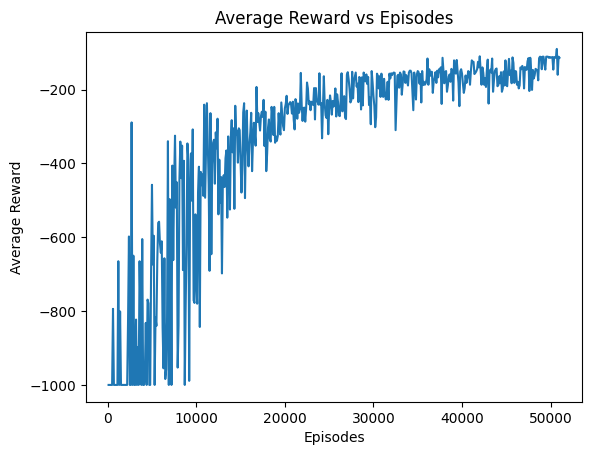

In [ ]:
class Agent:
    def __init__(self, env):
        self.env = env
        self.episode_reward = 0.0
        self.high_space = np.linspace(-1.2, 0.6, 30)
        self.speed_space = np.linspace(-0.07, 0.07, 30)
        self.num_states = (int(np.round(len(np.linspace(-1.2, 0.6, 30)))),int(np.round(len(np.linspace(-0.07, 0.07, 30)))))
        self.Q = np.random.uniform(low=-1, high=1,size=(self.num_states[0], self.num_states[1], env.action_space.n))
        #print(self.Q.shape)   # (30, 30, 3)

        self.EPS = EPS  # 체크가 안되는 오류로 추가함

    def discretize(self, stete): #환경의 연속적인 관측값을 이산 상태로 매핑
        high, speed =  stete[0], stete[1]
        high_bin = int(np.digitize(high, self.high_space))
        speed_bin = int(np.digitize(speed, self.speed_space))
        return (high_bin, speed_bin)

    def learn(self):
        # one episode learning

        # Discretize state
        state, _ = self.env.reset()
        state_adj = self.discretize(state)
        self.reward_total = 0
        self.reward = 0
        # Decay epsilon
        self.EPS = max(self.EPS - reduction, min_eps)

        for t in range(TURN_LIMIT):

            # Determine next action - epsilon greedy strategy
            if np.random.rand() < self.EPS:
                action = np.random.randint(0, self.env.action_space.n)
            else: # exploit
                action = np.argmax(self.Q[state_adj[0], state_adj[1]])

            # Get next state and reward
            state2, reward, done, _, _ = self.env.step(action)

            # Discretize state2
            state2_adj = self.discretize(state2)

            q_next_max = np.max(self.Q[state2_adj[0],state2_adj[1]])

            # Allow for terminal states
            if done and state2[0] >= 0.5:
                break

            # Q <- Q + a(Q' - Q)
            # <=> Q <- (1-a)Q + a(Q')
            else:
                delta = learning * (reward + GAMMA * q_next_max - self.Q[state_adj[0], state_adj[1], action])
                self.Q[state_adj[0], state_adj[1], action] += delta
                self.reward_total += reward
                state_adj = state2_adj

        return self.reward_total  # over limit

    def test(self):
        state, _ = self.env.reset()
        state_adj = self.discretize(state)
        self.test_reward_total = 0
        self.reward = 0
        for t in range(TURN_LIMIT):
            action = np.argmax(self.Q[state_adj[0], state_adj[1]])
            state2, reward, done, _, _ = self.env.step(action)
            state2_adj = self.discretize(state2)
            if done and state2[0] >= 0.5:
                break
            else:
                self.test_reward_total += reward
                state_adj = state2_adj
        return self.test_reward_total  # over limit

def main():
    env = gym.make('MountainCar-v0')
    agent = Agent(env)

    print("###### LEARNING #####")
    reward_total = 0.0
    score_list = []   # 100에피소드 단위로 에피소드 구간, 리워드, 입실론 기록
    score_list_plt = []   # 그래프 도출을 위한 별도 리스트

    # 현재 시각 기록
    startTime = time.time()

    for i in tqdm(range(EPISODE)):
        agent.learning = max(0,learning * pow(1 - 0.01, i // 100))   # learning_decay test : 0.01
        reward_total += agent.learn()
        # (셀프 데이터 체크 결과 확인후 보정) the input prameter 'episode' starts from 0 to episode-1 : +1 added
        if ((i+1) != 0) and ((i+1) % 100 == 0):
            i = i+1
            score_list.append("n_epi: {}, score: {:.1f}, eps: {:.1f}%".format(i, agent.learn(), agent.EPS * 100))
            score_list_plt.append(agent.learn())
    print("episodes      : {}".format(EPISODE))
    print("total reward  : {}".format(reward_total))
    print("average reward: {:.2f}".format(reward_total / EPISODE))
    # for group test
    print()
    print("score_list    :\n{}".format('\n'.join(score_list)))
    #print("Q Value       :{}".format(agent.Q))
    #print(agent.Q.shape)   # (19, 15, 3)

    # 경과 시간 체크
    exeTime = time.time() - startTime
    minutes, seconds = divmod(exeTime, 60)
    print("\n학습 완료(소요 시간 = {:.0f}분 {:.0f}초)".format(minutes, seconds))

    print("\n###### TEST #####")
    reward_total = 0.0
    for i in tqdm(range(TEST_EPISODE)):
        reward_total += agent.test()
        if ((i+1) != 0) and ((i+1) % 100 == 0):
            score_list_plt.append(agent.test())
    print("episodes      : {}".format(TEST_EPISODE))
    print("total reward  : {}".format(reward_total))
    print("average reward: {:.2f}".format(reward_total / TEST_EPISODE))
    #print("score_list    :\n{}".format('\n'.join(score_list_test)))

    print()
    print(score_list_plt)
    plt.plot(100 * (np.arange(len(score_list_plt)) + 1), score_list_plt)
    plt.xlabel('Episodes'), plt.ylabel('Average Reward'), plt.title('Average Reward vs Episodes')
    # Text(0.5, 1.0, 'Average Reward vs Episodes') : Title's position. (0.5, 1.0) = middle of x, upper line of y

    print("\n###### Q_value #####")
    print("Q Value       :{}\n".format(agent.Q))

if __name__ == "__main__":
    # main parameter
    learning = 0.1    # learning rate
    GAMMA = 0.99      # reward discount
    EPS = 0.9         # random walk

# sub parameter
    EPISODE = 50000   # project team maximum default
    TEST_EPISODE = 1000   # fot test setting
    TURN_LIMIT = 1000
    min_eps = 0
    reduction = (EPS - min_eps)/EPISODE

    main()

#ver.4-2 : 추가 실험 설계 - learning rate decay(cosine) + observation space more discrete
*   (19, 15, 3) ->  (30, 30, 3)
*   learning rate = 0.1 ㅣ GAMMA = 0.99 ㅣ epsilon = 0.9 ㅣ EPISODE = 50,000
*   결과 : average reward: -128.56  l  학습 완료(소요 시간 =  24분 17초)

###### LEARNING #####


100%|██████████| 50000/50000 [24:17<00:00, 34.31it/s]


episodes      : 50000
total reward  : -17141094.0
average reward: -342.82

score_list    :
n_epi: 100, score: -1000.0, eps: 89.8%
n_epi: 200, score: -1000.0, eps: 89.6%
n_epi: 300, score: -1000.0, eps: 89.5%
n_epi: 400, score: -1000.0, eps: 89.3%
n_epi: 500, score: -1000.0, eps: 89.1%
n_epi: 600, score: -1000.0, eps: 88.9%
n_epi: 700, score: -992.0, eps: 88.7%
n_epi: 800, score: -1000.0, eps: 88.5%
n_epi: 900, score: -1000.0, eps: 88.3%
n_epi: 1000, score: -1000.0, eps: 88.2%
n_epi: 1100, score: -585.0, eps: 88.0%
n_epi: 1200, score: -1000.0, eps: 87.8%
n_epi: 1300, score: -950.0, eps: 87.6%
n_epi: 1400, score: -1000.0, eps: 87.4%
n_epi: 1500, score: -1000.0, eps: 87.2%
n_epi: 1600, score: -1000.0, eps: 87.1%
n_epi: 1700, score: -1000.0, eps: 86.9%
n_epi: 1800, score: -973.0, eps: 86.7%
n_epi: 1900, score: -1000.0, eps: 86.5%
n_epi: 2000, score: -889.0, eps: 86.3%
n_epi: 2100, score: -1000.0, eps: 86.1%
n_epi: 2200, score: -668.0, eps: 86.0%
n_epi: 2300, score: -1000.0, eps: 85.8%
n_ep

100%|██████████| 1000/1000 [00:07<00:00, 133.09it/s]


episodes      : 1000
total reward  : -128559.0
average reward: -128.56

[-1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -496.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -880.0, -700.0, -768.0, -925.0, -596.0, -1000.0, -814.0, -1000.0, -896.0, -1000.0, -749.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -1000.0, -635.0, -1000.0, -781.0, -395.0, -760.0, -1000.0, -819.0, -1000.0, -933.0, -935.0, -424.0, -465.0, -530.0, -684.0, -788.0, -1000.0, -485.0, -1000.0, -788.0, -733.0, -1000.0, -437.0, -404.0, -654.0, -692.0, -793.0, -1000.0, -1000.0, -959.0, -722.0, -670.0, -1000.0, -583.0, -533.0, -427.0, -489.0, -332.0, -577.0, -442.0, -632.0, -703.0, -804.0, -877.0, -712.0, -856.0, -542.0, -441.0, -524.0, -568.0, -773.0, -301.0, -507.0, -837.0, -578.0, -1000.0, -508.0, -479.0, -618.0, -488.0, -769.0, -499.0, -762.0, -380.0, -786.0, -328.0, -491.0, -538.0, -424.0, -380.0, -728.

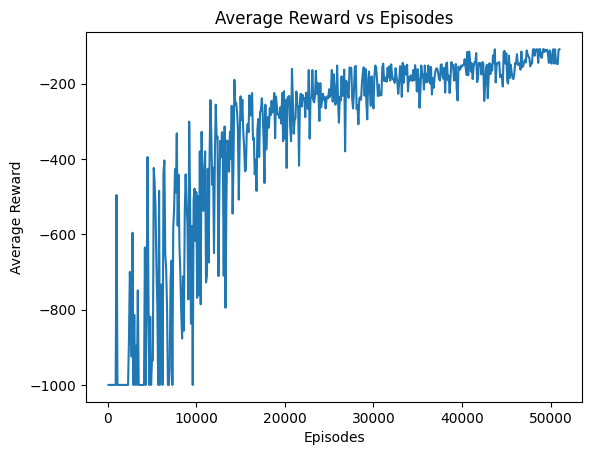

In [ ]:
class Agent:
    def __init__(self, env):
        self.env = env
        self.episode_reward = 0.0
        self.high_space = np.linspace(-1.2, 0.6, 30)
        self.speed_space = np.linspace(-0.07, 0.07, 30)
        self.num_states = (int(np.round(len(np.linspace(-1.2, 0.6, 30)))),int(np.round(len(np.linspace(-0.07, 0.07, 30)))))
        self.Q = np.random.uniform(low=-1, high=1,size=(self.num_states[0], self.num_states[1], env.action_space.n))
        #print(self.Q.shape)   # (30, 30, 3)

        self.EPS = EPS  # 체크가 안되는 오류로 추가함

    def discretize(self, stete): #환경의 연속적인 관측값을 이산 상태로 매핑
        high, speed =  stete[0], stete[1]
        high_bin = int(np.digitize(high, self.high_space))
        speed_bin = int(np.digitize(speed, self.speed_space))
        return (high_bin, speed_bin)

    def learn(self):
        # one episode learning

        # Discretize state
        state, _ = self.env.reset()
        state_adj = self.discretize(state)
        self.reward_total = 0
        self.reward = 0
        # Decay epsilon
        self.EPS = max(self.EPS - reduction, min_eps)

        for t in range(TURN_LIMIT):

            # Determine next action - epsilon greedy strategy
            if np.random.rand() < self.EPS:
                action = np.random.randint(0, self.env.action_space.n)
            else: # exploit
                action = np.argmax(self.Q[state_adj[0], state_adj[1]])

            # Get next state and reward
            state2, reward, done, _, _ = self.env.step(action)

            # Discretize state2
            state2_adj = self.discretize(state2)

            q_next_max = np.max(self.Q[state2_adj[0],state2_adj[1]])

            # Allow for terminal states
            if done and state2[0] >= 0.5:
                break

            # Q <- Q + a(Q' - Q)
            # <=> Q <- (1-a)Q + a(Q')
            else:
                delta = learning * (reward + GAMMA * q_next_max - self.Q[state_adj[0], state_adj[1], action])
                self.Q[state_adj[0], state_adj[1], action] += delta
                self.reward_total += reward
                state_adj = state2_adj

        return self.reward_total  # over limit

    def test(self):
        state, _ = self.env.reset()
        state_adj = self.discretize(state)
        self.test_reward_total = 0
        self.reward = 0
        for t in range(TURN_LIMIT):
            action = np.argmax(self.Q[state_adj[0], state_adj[1]])
            state2, reward, done, _, _ = self.env.step(action)
            state2_adj = self.discretize(state2)
            if done and state2[0] >= 0.5:
                break
            else:
                self.test_reward_total += reward
                state_adj = state2_adj
        return self.test_reward_total  # over limit

def main():
    env = gym.make('MountainCar-v0')
    agent = Agent(env)

    print("###### LEARNING #####")
    reward_total = 0.0
    score_list = []   # 100에피소드 단위로 에피소드 구간, 리워드, 입실론 기록
    score_list_plt = []   # 그래프 도출을 위한 별도 리스트

    # 현재 시각 기록
    startTime = time.time()

    for i in tqdm(range(EPISODE)):
        agent.learning = 0.5 * learning * (1 + np.cos(( i  * np.pi ) / 50000))
        reward_total += agent.learn()
        # (셀프 데이터 체크 결과 확인후 보정) the input prameter 'episode' starts from 0 to episode-1 : +1 added
        if ((i+1) != 0) and ((i+1) % 100 == 0):
            i = i+1
            score_list.append("n_epi: {}, score: {:.1f}, eps: {:.1f}%".format(i, agent.learn(), agent.EPS * 100))
            score_list_plt.append(agent.learn())
    print("episodes      : {}".format(EPISODE))
    print("total reward  : {}".format(reward_total))
    print("average reward: {:.2f}".format(reward_total / EPISODE))
    # for group test
    print()
    print("score_list    :\n{}".format('\n'.join(score_list)))
    #print("Q Value       :{}".format(agent.Q))
    #print(agent.Q.shape)   # (19, 15, 3)

    # 경과 시간 체크
    exeTime = time.time() - startTime
    minutes, seconds = divmod(exeTime, 60)
    print("\n학습 완료(소요 시간 = {:.0f}분 {:.0f}초)".format(minutes, seconds))

    print("\n###### TEST #####")
    reward_total = 0.0
    for i in tqdm(range(TEST_EPISODE)):
        reward_total += agent.test()
        if ((i+1) != 0) and ((i+1) % 100 == 0):
            score_list_plt.append(agent.test())
    print("episodes      : {}".format(TEST_EPISODE))
    print("total reward  : {}".format(reward_total))
    print("average reward: {:.2f}".format(reward_total / TEST_EPISODE))
    #print("score_list    :\n{}".format('\n'.join(score_list_test)))

    print()
    print(score_list_plt)
    plt.plot(100 * (np.arange(len(score_list_plt)) + 1), score_list_plt)
    plt.xlabel('Episodes'), plt.ylabel('Average Reward'), plt.title('Average Reward vs Episodes')
    # Text(0.5, 1.0, 'Average Reward vs Episodes') : Title's position. (0.5, 1.0) = middle of x, upper line of y

    print("\n###### Q_value #####")
    print("Q Value       :{}\n".format(agent.Q))

if __name__ == "__main__":
    # main parameter
    learning = 0.1    # learning rate
    GAMMA = 0.99      # reward discount
    EPS = 0.9         # random walk

# sub parameter
    EPISODE = 50000   # project team maximum default
    TEST_EPISODE = 1000   # fot test setting
    TURN_LIMIT = 1000
    min_eps = 0
    reduction = (EPS - min_eps)/EPISODE

    main()

#Parameter adjustment iteration - ver.1 기본모델 적용
*    Learning_values = [0.1, 0.2]
*    EPS_values = [0.1, 0.5, 0.9, 0.99]



In [ ]:
class Agent:
    def __init__(self, env):
        self.env = env
        self.episode_reward = 0.0
        # 공간을 이산화 하고 분할된 공간에 랜덤 Q-value 설정 (Q-value를 정수형으로 모두 변환)
        self.num_states = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
        self.num_states = np.round(self.num_states, 0).astype(int) + 1
        self.Q = np.random.uniform(low=-1, high=1,size=(self.num_states[0], self.num_states[1], env.action_space.n))
        self.EPS = EPS  # 체크가 안되는 오류로 추가함

        # state level, discretize
    def discretize(self, state):
        state_adj = (state - self.env.observation_space.low) * np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        return state_adj

    def learn(self):
        # one episode learning

        # Discretize state
        state, _ = self.env.reset()
        state_adj = self.discretize(state)
        self.reward_total = 0
        self.reward = 0
        # Decay epsilon
        self.EPS = max(self.EPS - reduction, min_eps)

        for t in range(TURN_LIMIT):

            # Determine next action - epsilon greedy strategy
            if np.random.rand() < self.EPS:
                action = np.random.randint(0, self.env.action_space.n)
            else: # exploit
                action = np.argmax(self.Q[state_adj[0], state_adj[1]])

            # Get next state and reward
            state2, reward, done, _, _ = self.env.step(action)

            # Discretize state2
            state2_adj = self.discretize(state2)

            q_next_max = np.max(self.Q[state2_adj[0],state2_adj[1]])

            # Allow for terminal states
            if done and state2[0] >= 0.5:
                break

            # Q <- Q + a(Q' - Q)
            # <=> Q <- (1-a)Q + a(Q')
            else:
                delta = learning * (reward + GAMMA * q_next_max - self.Q[state_adj[0], state_adj[1], action])
                self.Q[state_adj[0], state_adj[1], action] += delta
                self.reward_total += reward
                state_adj = state2_adj

        return self.reward_total  # over limit

    def test(self):
        state, _ = self.env.reset()
        state_adj = self.discretize(state)
        self.test_reward_total = 0
        self.reward = 0
        for t in range(TURN_LIMIT):
            action = np.argmax(self.Q[state_adj[0], state_adj[1]])
            state2, reward, done, _, _ = self.env.step(action)
            state2_adj = self.discretize(state2)
            if done and state2[0] >= 0.5:
                break
            else:
                self.test_reward_total += reward
                state_adj = state2_adj
        return self.test_reward_total  # over limit

def main():
    env = gym.make('MountainCar-v0')
    agent = Agent(env)

    reward_total = 0.0
    for i in range(EPISODE):
        reward_total += agent.learn()

    reward_total_TEST = 0.0
    for i in range(TEST_EPISODE):
        reward_total_TEST += agent.test()

    results.append({ 'learning': learning,'GAMMA': GAMMA,'EPS': EPS,
                    'average_reward': reward_total_TEST / TEST_EPISODE })

    # 정상 진행여부 체크
    #for result in results:
    #    print(f"Learning Rate: {result['learning']}, Gamma: {result['GAMMA']}, Epsilon: {result['EPS']}, Average Reward: {result['average_reward']}")

    return results


if __name__ == "__main__":

    # sub parameter
    EPISODE = 50000  # project team maximum default
    TEST_EPISODE = 1000   # fot test setting
    TURN_LIMIT = 1000
    min_eps = 0


    # main parameter
    results = []
    learning_values = [0.1, 0.2] # 러닝레이트 작은것에서 부터 시작하는 구조로 접근하는 것이 일반적이며, max 0.2로 보고 테스트함
    # GAMMA_values = [0.9, 0.99]  # 감마는 일반적으로 1, 0.99, 0.95, 0.9, 0.85, 0.8 ... 구조로보이나, 1테스트시는 안좋아서 기존보다 하나 더 낮은값으로 테스트
    GAMMA_values = [0.99]  # 학습 소요시간이 너무 커 GAMMA는 고정. 다른 파라미터 중심으로만 테스트
    EPS_values = [0.1, 0.5, 0.9, 0.99]  # 입실론 : 다양하게 확인 희망
    for l in learning_values:
        for g in GAMMA_values:
            for e in EPS_values:
                learning = l # learning rate
                GAMMA = g  # reward discount
                EPS = e  # random walk
                reduction = (EPS - min_eps)/EPISODE   # 위치 변경
                main()

    # 내림차순 정렬
    results.sort(key=lambda x: x['average_reward'], reverse=True)
    results = '\n'.join(["learning: {:<5}, GAMMA: {:<5}, EPS: {:<5}, average_reward: {:<8}".format(item['learning'], item['GAMMA'], item['EPS'], item['average_reward']) for item in results])
    print(f"\nResults (Highest to Lowest):\n", results)
    #current_combination = len(results)
    #print(f'{current_combination} completed')


Results (Highest to Lowest):
 learning: 0.1  , GAMMA: 0.99 , EPS: 0.5  , average_reward: -132.715
learning: 0.2  , GAMMA: 0.99 , EPS: 0.5  , average_reward: -140.573
learning: 0.1  , GAMMA: 0.99 , EPS: 0.99 , average_reward: -142.806
learning: 0.2  , GAMMA: 0.99 , EPS: 0.9  , average_reward: -144.297
learning: 0.2  , GAMMA: 0.99 , EPS: 0.1  , average_reward: -145.841
learning: 0.2  , GAMMA: 0.99 , EPS: 0.99 , average_reward: -145.944
learning: 0.1  , GAMMA: 0.99 , EPS: 0.9  , average_reward: -149.543
learning: 0.1  , GAMMA: 0.99 , EPS: 0.1  , average_reward: -169.842
543 completed


#Parameter adjustment iteration - ver.3 적용
*    Learning_values = [0.1, 0.2]
*    EPS_values = [0.1, 0.5, 0.9, 0.99]

In [ ]:
class Agent:
    def __init__(self, env):
        self.env = env
        self.episode_reward = 0.0
        self.high_space = np.linspace(-1.2, 0.6, 30)
        self.speed_space = np.linspace(-0.07, 0.07, 30)
        self.num_states = (int(np.round(len(np.linspace(-1.2, 0.6, 30)))),int(np.round(len(np.linspace(-0.07, 0.07, 30)))))
        self.Q = np.random.uniform(low=-1, high=1,size=(self.num_states[0], self.num_states[1], env.action_space.n))
        #print(self.Q.shape)   # (30, 30, 3)

        self.EPS = EPS  # 체크가 안되는 오류로 추가함

    def discretize(self, stete): #환경의 연속적인 관측값을 이산 상태로 매핑
        high, speed =  stete[0], stete[1]
        high_bin = int(np.digitize(high, self.high_space))
        speed_bin = int(np.digitize(speed, self.speed_space))
        return (high_bin, speed_bin)

    def learn(self):
        # one episode learning

        # Discretize state
        state, _ = self.env.reset()
        state_adj = self.discretize(state)
        self.reward_total = 0
        self.reward = 0
        # Decay epsilon
        self.EPS = max(self.EPS - reduction, min_eps)

        for t in range(TURN_LIMIT):

            # Determine next action - epsilon greedy strategy
            if np.random.rand() < self.EPS:
                action = np.random.randint(0, self.env.action_space.n)
            else: # exploit
                action = np.argmax(self.Q[state_adj[0], state_adj[1]])

            # Get next state and reward
            state2, reward, done, _, _ = self.env.step(action)

            # Discretize state2
            state2_adj = self.discretize(state2)

            q_next_max = np.max(self.Q[state2_adj[0],state2_adj[1]])

            # Allow for terminal states
            if done and state2[0] >= 0.5:
                break

            # Q <- Q + a(Q' - Q)
            # <=> Q <- (1-a)Q + a(Q')
            else:
                delta = learning * (reward + GAMMA * q_next_max - self.Q[state_adj[0], state_adj[1], action])
                self.Q[state_adj[0], state_adj[1], action] += delta
                self.reward_total += reward
                state_adj = state2_adj

        return self.reward_total  # over limit



    def test(self):
        state, _ = self.env.reset()
        state_adj = self.discretize(state)
        self.test_reward_total = 0
        self.reward = 0
        for t in range(TURN_LIMIT):
            action = np.argmax(self.Q[state_adj[0], state_adj[1]])
            state2, reward, done, _, _ = self.env.step(action)
            state2_adj = self.discretize(state2)
            if done and state2[0] >= 0.5:
                break
            else:
                self.test_reward_total += reward
                state_adj = state2_adj
        return self.test_reward_total  # over limit


def main():
    env = gym.make('MountainCar-v0')
    agent = Agent(env)

    #score_list = []   # 100에피소드 단위로 에피소드 구간, 리워드, 입실론 기록

    reward_total = 0.0
    for i in range(EPISODE):
        reward_total += agent.learn()

    reward_total_TEST = 0.0
    # score_list_test = []  # 실제 값들의 테스트를 위해 추가 리스트 생성 및 print 진행해봄
    for i in range(TEST_EPISODE):
        reward_total_TEST += agent.test()

    results.append({ 'learning': learning,'GAMMA': GAMMA,'EPS': EPS,
                    'average_reward': reward_total_TEST / TEST_EPISODE })

    #for result in results:
    #    print(f"Learning Rate: {result['learning']}, Gamma: {result['GAMMA']}, Epsilon: {result['EPS']}, Average Reward: {result['average_reward']}")

    return results


if __name__ == "__main__":

    # sub parameter
    EPISODE = 50000  # project team maximum default
    TEST_EPISODE = 1000   # fot test setting
    TURN_LIMIT = 1000
    min_eps = 0


    # main parameter
    results = []
    learning_values = [0.1, 0.2] # 러닝레이트 작은것에서 부터 시작하는 구조로 접근하는 것이 일반적이며, max 0.2로 보고 테스트함
    # GAMMA_values = [0.9, 0.99]  # 감마는 일반적으로 1, 0.99, 0.95, 0.9, 0.85, 0.8 ... 구조로보이나, 1테스트시는 안좋아서 기존보다 하나 더 낮은값으로 테스트
    GAMMA_values = [0.99]  # 다른 파라미터 중심으로 테스트
    EPS_values = [0.1, 0.5, 0.9, 0.99]  # 입실론 : 다양하게 확인 희망
    for l in learning_values:
        for g in GAMMA_values:
            for e in EPS_values:
                learning = l # learning rate
                GAMMA = g  # reward discount
                EPS = e  # random walk
                reduction = (EPS - min_eps)/EPISODE   # 위치 변경
                main()

    # 내림차순 정렬
    results.sort(key=lambda x: x['average_reward'], reverse=True)
    results = '\n'.join(["learning: {:<5}, GAMMA: {:<5}, EPS: {:<5}, average_reward: {:<8}".format(item['learning'], item['GAMMA'], item['EPS'], item['average_reward']) for item in results])
    print(f"\nResults (Highest to Lowest):\n", results)
    current_combination = len(results)
    print(f'{current_combination} completed')


Results (Highest to Lowest):
 learning: 0.1  , GAMMA: 0.99 , EPS: 0.1  , average_reward: -130.588
learning: 0.2  , GAMMA: 0.99 , EPS: 0.5  , average_reward: -134.128
learning: 0.1  , GAMMA: 0.99 , EPS: 0.5  , average_reward: -137.395
learning: 0.1  , GAMMA: 0.99 , EPS: 0.9  , average_reward: -140.31 
learning: 0.2  , GAMMA: 0.99 , EPS: 0.9  , average_reward: -140.737
learning: 0.2  , GAMMA: 0.99 , EPS: 0.1  , average_reward: -141.22 
learning: 0.1  , GAMMA: 0.99 , EPS: 0.99 , average_reward: -142.741
learning: 0.2  , GAMMA: 0.99 , EPS: 0.99 , average_reward: -175.422
543 completed


#Parameter adjustment iteration - ver.4-2 적용
*    Learning_values = [0.1, 0.2]
*    EPS_values = [0.1, 0.5, 0.9, 0.99]

In [ ]:
class Agent:
    def __init__(self, env):
        self.env = env
        self.episode_reward = 0.0
        self.high_space = np.linspace(-1.2, 0.6, 30)
        self.speed_space = np.linspace(-0.07, 0.07, 30)
        self.num_states = (int(np.round(len(np.linspace(-1.2, 0.6, 30)))),int(np.round(len(np.linspace(-0.07, 0.07, 30)))))
        self.Q = np.random.uniform(low=-1, high=1,size=(self.num_states[0], self.num_states[1], env.action_space.n))
        #print(self.Q.shape)   # (30, 30, 3)

        self.EPS = EPS  # 체크가 안되는 오류로 추가함

    def discretize(self, stete): #환경의 연속적인 관측값을 이산 상태로 매핑
        high, speed =  stete[0], stete[1]
        high_bin = int(np.digitize(high, self.high_space))
        speed_bin = int(np.digitize(speed, self.speed_space))
        return (high_bin, speed_bin)

    def learn(self):
        # one episode learning

        # Discretize state
        state, _ = self.env.reset()
        state_adj = self.discretize(state)
        self.reward_total = 0
        self.reward = 0
        # Decay epsilon
        self.EPS = max(self.EPS - reduction, min_eps)

        for t in range(TURN_LIMIT):

            # Determine next action - epsilon greedy strategy
            if np.random.rand() < self.EPS:
                action = np.random.randint(0, self.env.action_space.n)
            else: # exploit
                action = np.argmax(self.Q[state_adj[0], state_adj[1]])

            # Get next state and reward
            state2, reward, done, _, _ = self.env.step(action)

            # Discretize state2
            state2_adj = self.discretize(state2)

            q_next_max = np.max(self.Q[state2_adj[0],state2_adj[1]])

            # Allow for terminal states
            if done and state2[0] >= 0.5:
                break

            # Q <- Q + a(Q' - Q)
            # <=> Q <- (1-a)Q + a(Q')
            else:
                delta = learning * (reward + GAMMA * q_next_max - self.Q[state_adj[0], state_adj[1], action])
                self.Q[state_adj[0], state_adj[1], action] += delta
                self.reward_total += reward
                state_adj = state2_adj

        return self.reward_total  # over limit



    def test(self):
        state, _ = self.env.reset()
        state_adj = self.discretize(state)
        self.test_reward_total = 0
        self.reward = 0
        for t in range(TURN_LIMIT):
            action = np.argmax(self.Q[state_adj[0], state_adj[1]])
            state2, reward, done, _, _ = self.env.step(action)
            state2_adj = self.discretize(state2)
            if done and state2[0] >= 0.5:
                break
            else:
                self.test_reward_total += reward
                state_adj = state2_adj
        return self.test_reward_total  # over limit

def main():
    env = gym.make('MountainCar-v0')
    agent = Agent(env)

    #score_list = []   # 100에피소드 단위로 에피소드 구간, 리워드, 입실론 기록

    reward_total = 0.0
    for i in range(EPISODE):
        agent.learning = 0.5 * learning * (1 + np.cos(( i  * np.pi ) / 50000))
        reward_total += agent.learn()
    #print("episodes      : {}".format(EPISODE))
    #print("total reward  : {}".format(reward_total))
    #print("average reward: {:.2f}".format(reward_total / EPISODE))
    #for group test
    #print()
    #print("score_list    :\n{}".format('\n'.join(score_list)))
    #print("Q Value       :{}".format(agent.Q))
    #print(agent.Q.shape)   # (19, 15, 3)

    reward_total_TEST = 0.0
    # score_list_test = []  # 실제 값들의 테스트를 위해 추가 리스트 생성 및 print 진행해봄
    for i in range(TEST_EPISODE):
        reward_total_TEST += agent.test()

    results.append({ 'learning': learning,'GAMMA': GAMMA,'EPS': EPS,
                    'average_reward': reward_total_TEST / TEST_EPISODE })

    #for result in results:
    #    print(f"Learning Rate: {result['learning']}, Gamma: {result['GAMMA']}, Epsilon: {result['EPS']}, Average Reward: {result['average_reward']}")

    return results


if __name__ == "__main__":

    # sub parameter
    EPISODE = 50000  # project team maximum default
    TEST_EPISODE = 1000   # fot test setting
    TURN_LIMIT = 1000
    min_eps = 0


    # main parameter
    results = []
    learning_values = [0.1, 0.2] # 러닝레이트 작은것에서 부터 시작하는 구조로 접근하는 것이 일반적이며, max 0.2로 보고 테스트함
    # GAMMA_values = [0.9, 0.99]  # 감마는 일반적으로 1, 0.99, 0.95, 0.9, 0.85, 0.8 ... 구조로보이나, 1테스트시는 안좋아서 기존보다 하나 더 낮은값으로 테스트
    GAMMA_values = [0.99]  # 다른 파라미터 중심으로 테스트
    EPS_values = [0.1, 0.5, 0.9, 0.99]  # 입실론 : 다양하게 확인 희망
    for l in learning_values:
        for g in GAMMA_values:
            for e in EPS_values:
                learning = l # learning rate
                GAMMA = g  # reward discount
                EPS = e  # random walk
                reduction = (EPS - min_eps)/EPISODE   # 위치 변경
                main()

    # 내림차순 정렬
    results.sort(key=lambda x: x['average_reward'], reverse=True)
    results = '\n'.join(["learning: {:<5}, GAMMA: {:<5}, EPS: {:<5}, average_reward: {:<8}".format(item['learning'], item['GAMMA'], item['EPS'], item['average_reward']) for item in results])
    print(f"\nResults (Highest to Lowest):\n", results)
    current_combination = len(results)
    print(f'{current_combination} completed')


Results (Highest to Lowest):
 learning: 0.1  , GAMMA: 0.99 , EPS: 0.1  , average_reward: -126.283
learning: 0.1  , GAMMA: 0.99 , EPS: 0.99 , average_reward: -127.422
learning: 0.1  , GAMMA: 0.99 , EPS: 0.5  , average_reward: -134.509
learning: 0.2  , GAMMA: 0.99 , EPS: 0.5  , average_reward: -135.343
learning: 0.2  , GAMMA: 0.99 , EPS: 0.99 , average_reward: -149.305
learning: 0.2  , GAMMA: 0.99 , EPS: 0.1  , average_reward: -167.856
learning: 0.2  , GAMMA: 0.99 , EPS: 0.9  , average_reward: -170.701
learning: 0.1  , GAMMA: 0.99 , EPS: 0.9  , average_reward: -175.894
543 completed


#(최종 모델 결과) ver.4-2 + Parameter adjustment result 적용
*   ver.4-2 : moer discrete space(30, 30, 3) + learning rate decay(cosine decay)
*   learning rate = 0.1 ㅣ GAMMA = 0.99 ㅣ **epsilon = 0.1** ㅣ EPISODE = 50,000
*   결과 : average reward: -125.01  l  학습 완료(소요 시간 = 14분 19초)

###### LEARNING #####


100%|██████████| 50000/50000 [14:18<00:00, 58.23it/s]


episodes      : 50000
total reward  : -7922517.0
average reward: -158.45

score_list    :
n_epi: 100, score: -1000.0, eps: 10.0%
n_epi: 200, score: -617.0, eps: 10.0%
n_epi: 300, score: -499.0, eps: 9.9%
n_epi: 400, score: -562.0, eps: 9.9%
n_epi: 500, score: -438.0, eps: 9.9%
n_epi: 600, score: -481.0, eps: 9.9%
n_epi: 700, score: -238.0, eps: 9.9%
n_epi: 800, score: -230.0, eps: 9.8%
n_epi: 900, score: -316.0, eps: 9.8%
n_epi: 1000, score: -234.0, eps: 9.8%
n_epi: 1100, score: -257.0, eps: 9.8%
n_epi: 1200, score: -342.0, eps: 9.8%
n_epi: 1300, score: -235.0, eps: 9.7%
n_epi: 1400, score: -309.0, eps: 9.7%
n_epi: 1500, score: -243.0, eps: 9.7%
n_epi: 1600, score: -231.0, eps: 9.7%
n_epi: 1700, score: -195.0, eps: 9.7%
n_epi: 1800, score: -276.0, eps: 9.6%
n_epi: 1900, score: -202.0, eps: 9.6%
n_epi: 2000, score: -164.0, eps: 9.6%
n_epi: 2100, score: -165.0, eps: 9.6%
n_epi: 2200, score: -235.0, eps: 9.6%
n_epi: 2300, score: -152.0, eps: 9.5%
n_epi: 2400, score: -154.0, eps: 9.5%
n_ep

100%|██████████| 1000/1000 [00:19<00:00, 52.22it/s]


episodes      : 1000
total reward  : -125007.0
average reward: -125.01


###### confidence_interval ######

confidence_interval(test episode): (-128.38, -121.33)


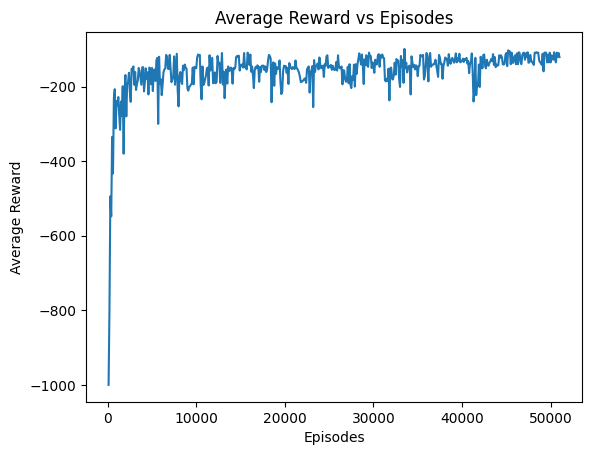

In [ ]:
class Agent:
    def __init__(self, env):
        self.env = env
        self.episode_reward = 0.0
        self.high_space = np.linspace(-1.2, 0.6, 30)
        self.speed_space = np.linspace(-0.07, 0.07, 30)
        self.num_states = (int(np.round(len(np.linspace(-1.2, 0.6, 30)))),int(np.round(len(np.linspace(-0.07, 0.07, 30)))))
        self.Q = np.random.uniform(low=-1, high=1,size=(self.num_states[0], self.num_states[1], env.action_space.n))
        #print(self.Q.shape)   # (30, 30, 3)
        self.EPS = EPS

    def discretize(self, stete): #환경의 연속적인 관측값을 이산 상태로 매핑
        high, speed =  stete[0], stete[1]
        high_bin = int(np.digitize(high, self.high_space))
        speed_bin = int(np.digitize(speed, self.speed_space))
        return (high_bin, speed_bin)

    def learn(self):
        # one episode learning

        # Discretize state
        state, _ = self.env.reset()
        state_adj = self.discretize(state)
        self.reward_total = 0
        self.reward = 0
        # Decay epsilon
        self.EPS = max(self.EPS - reduction, min_eps)

        for t in range(TURN_LIMIT):

            # Determine next action - epsilon greedy strategy
            if np.random.rand() < self.EPS:
                action = np.random.randint(0, self.env.action_space.n)
            else: # exploit
                action = np.argmax(self.Q[state_adj[0], state_adj[1]])

            # Get next state and reward
            state2, reward, done, _, _ = self.env.step(action)

            # Discretize state2
            state2_adj = self.discretize(state2)

            q_next_max = np.max(self.Q[state2_adj[0],state2_adj[1]])

            # Allow for terminal states
            if done and state2[0] >= 0.5:
                break

            # Q <- Q + a(Q' - Q)
            # <=> Q <- (1-a)Q + a(Q')
            else:
                delta = learning * (reward + GAMMA * q_next_max - self.Q[state_adj[0], state_adj[1], action])
                self.Q[state_adj[0], state_adj[1], action] += delta
                self.reward_total += reward
                state_adj = state2_adj

        return self.reward_total  # over limit



    def test(self):
        state, _ = self.env.reset()
        state_adj = self.discretize(state)
        self.test_reward_total = 0
        self.reward = 0
        for t in range(TURN_LIMIT):
            action = np.argmax(self.Q[state_adj[0], state_adj[1]])
            state2, reward, done, _, _ = self.env.step(action)
            state2_adj = self.discretize(state2)
            if done and state2[0] >= 0.5:
                break
            else:
                self.test_reward_total += reward
                state_adj = state2_adj
        return self.test_reward_total  # over limit

def main():
    env = gym.make('MountainCar-v0')
    agent = Agent(env)

    print("###### LEARNING #####")
    reward_total = 0.0
    score_list = []   # 100에피소드 단위로 에피소드 구간, 리워드, 입실론 기록
    score_list_plt = []   # 그래프 도출을 위한 별도 리스트

    # 현재 시각 기록
    startTime = time.time()

    for i in tqdm(range(EPISODE)):
        agent.learning = 0.5 * learning * (1 + np.cos(( i  * np.pi ) / 50000))
        reward_total += agent.learn()
        # (셀프 데이터 체크 결과 확인후 보정) the input prameter 'episode' starts from 0 to episode-1 : +1 added
        if ((i+1) != 0) and ((i+1) % 100 == 0):
            i = i+1
            score_list.append("n_epi: {}, score: {:.1f}, eps: {:.1f}%".format(i, agent.learn(), agent.EPS * 100))
            score_list_plt.append(agent.learn())
    print("episodes      : {}".format(EPISODE))
    print("total reward  : {}".format(reward_total))
    print("average reward: {:.2f}".format(reward_total / EPISODE))
    # for group test
    print()
    print("score_list    :\n{}".format('\n'.join(score_list)))
    #print("Q Value       :{}".format(agent.Q))
    #print(agent.Q.shape)   # (19, 15, 3)

    # 경과 시간 체크
    exeTime = time.time() - startTime
    minutes, seconds = divmod(exeTime, 60)
    print("\n학습 완료(소요 시간 = {:.0f}분 {:.0f}초)".format(minutes, seconds))


    # 신뢰구간을 위한 리스트 추가
    confidenc_list = []

    print("\n###### TEST #####")
    reward_total = 0.0
    # score_list_test = []  # 실제 값들의 테스트를 위해 추가 리스트 생성 및 print 진행해봄
    for i in tqdm(range(TEST_EPISODE)):
        reward_total += agent.test()
        confidenc_list.append(agent.test())
        if ((i+1) != 0) and ((i+1) % 100 == 0):
            score_list_plt.append(agent.test())
    print("episodes      : {}".format(TEST_EPISODE))
    print("total reward  : {}".format(reward_total))
    print("average reward: {:.2f}".format(reward_total / TEST_EPISODE))

    print()
    #print(score_list_plt)    #그래프를 위한 리스트 검증
    plt.plot(100 * (np.arange(len(score_list_plt)) + 1), score_list_plt)
    plt.xlabel('Episodes'), plt.ylabel('Average Reward'), plt.title('Average Reward vs Episodes')
    # 코드 결과 : Text(0.5, 1.0, 'Average Reward vs Episodes') : Title's position. (0.5, 1.0) = middle of x, upper line of y

    #print("\n###### Q_value #####")
    #print("Q Value       :{}\n".format(agent.Q))


    # 신뢰구간을 위한 리스트 추가
    #print(len(confidenc_list))

    confidence = 0.95
    confidence_interval = t.interval(confidence, df=len(confidenc_list)-1, loc=np.mean(confidenc_list), scale=sem(confidenc_list))
    confidence_interval = tuple(round(val, 2) for val in confidence_interval)
    #print("\nconfidence_interval_return = ".format(confidence_interval))
    print("\n###### confidence_interval ######\n")
    print("confidence_interval(test episode):", confidence_interval)

if __name__ == "__main__":
    # main parameter
    learning = 0.1    # learning rate
    GAMMA = 0.99      # reward discount
    EPS = 0.1         # random walk

# sub parameter
    EPISODE = 50000   # project team maximum default
    TEST_EPISODE = 1000   # fot test setting
    TURN_LIMIT = 1000
    min_eps = 0
    reduction = (EPS - min_eps)/EPISODE

    main()